<a href="https://colab.research.google.com/github/rbhattar07/Python-Projects--Data-Analysis/blob/main/US_counties_COVID_19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial formalities

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riddhbhattar","key":"f7363c0fb7a444e5f636f321f1cf547c"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Mar  2 17:08 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!pwd
!kaggle datasets list

/content
ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                     Wine Quality Dataset                                21KB  2022-01-15 19:15:11           8016  
mkoklu42/pistachio-dataset                                       Pistachio Dataset                                    2MB  2022-02-11 21:06:50            111  
prasertk/netflix-subscription-price-in-different-countries       Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           6130  
majyhain/height-of-male-and-female-by-country-2022               Height of Male and Female by Country 2022            4KB  2022-02-02 00:40:19           3323  
ashishjangra27/ted-talks       

In [8]:
!kaggle datasets download -d fireballbyedimyrnmom/us-counties-covid-19-dataset

 37% 9.00M/24.6M [00:00<00:00, 25.2MB/s]
100% 24.6M/24.6M [00:00<00:00, 49.1MB/s]


In [9]:
!unzip  '/content/us-counties-covid-19-dataset.zip'

Archive:  /content/us-counties-covid-19-dataset.zip
  inflating: us-counties.csv         


# US Countries Covid-19 Data Analysis

## Importing libraries and loading the CSV file

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
datafile = '/content/us-counties.csv'
us_covid_df = pd.read_csv(datafile)

## Data Info, Cleaning and Preparation

In [12]:
us_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252245 entries, 0 to 2252244
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 103.1+ MB


In [13]:
us_covid_df.describe()

,fips,cases,deaths
count,2.231290e+06,2.252245e+06,2.200646e+06
mean,3.139024e+04,8.405487e+03,1.453288e+02
std,1.633873e+04,3.939713e+04,7.684315e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.902100e+04,3.070000e+02,5.000000e+00
50%,3.000900e+04,1.487000e+03,2.800000e+01
75%,4.610900e+04,4.926000e+03,8.900000e+01
max,7.803000e+04,2.792334e+06,3.975400e+04


In [14]:
us_covid_df.isna().sum()
us_covid_df = us_covid_df.dropna(subset = ['fips','deaths'])
us_covid_df.duplicated().sum()
us_covid_df.drop_duplicates(keep = 'first', inplace = True)

In [15]:
us_covid_df['year']= pd.DatetimeIndex(us_covid_df.date).year
us_covid_df['month']= pd.DatetimeIndex(us_covid_df.date).month
us_covid_df['day']= pd.DatetimeIndex(us_covid_df.date).day

In [16]:
us_covid_df = us_covid_df.drop(columns = ['date'])

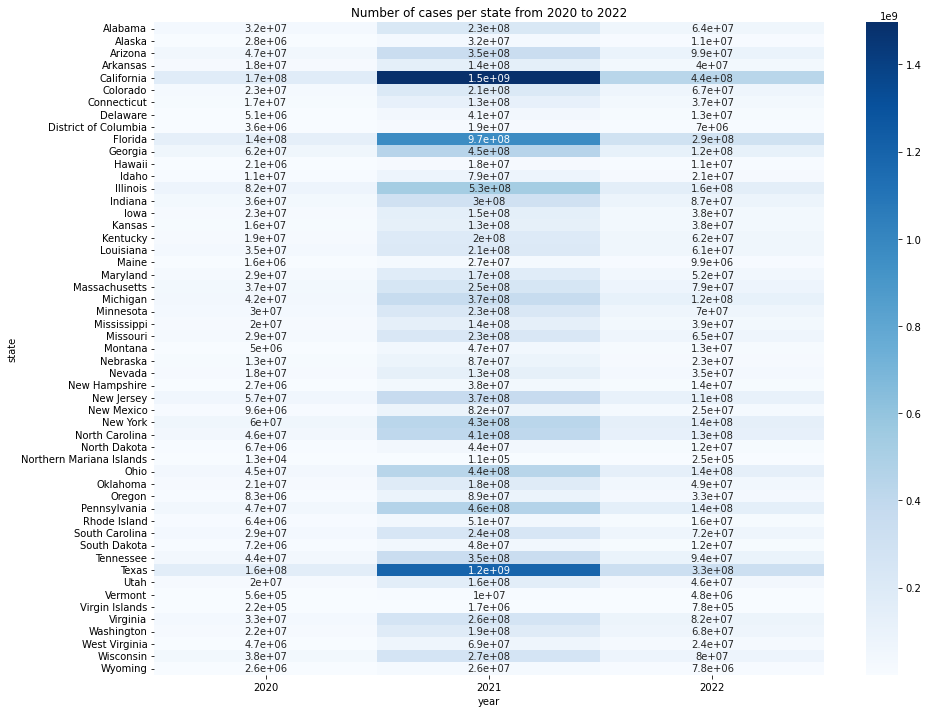

In [17]:
us_covid_df_allyearcases_gp = us_covid_df.groupby(['state','year'], as_index= False)['cases'].sum()
us_covid_df_allyearcases_gp = us_covid_df_allyearcases_gp.pivot('state', 'year', 'cases')
f, ax = plt.subplots(figsize=(15, 12))
plt.title("Number of cases per state from 2020 to 2022")
sns.heatmap(us_covid_df_allyearcases_gp, annot=True, cmap='Blues');

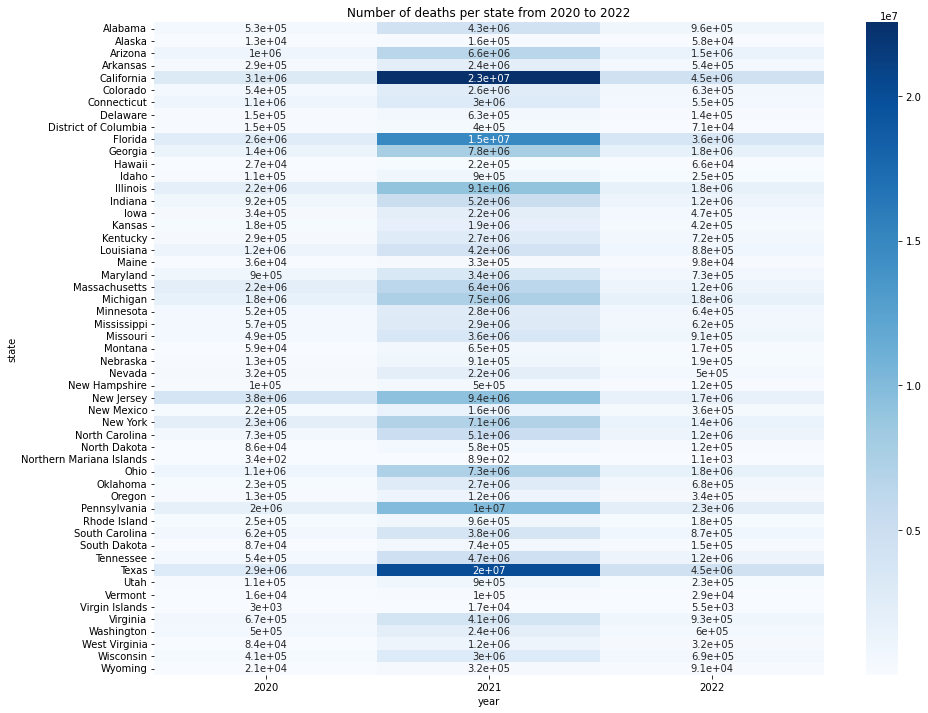

In [18]:
us_covid_df_allyeardeaths_gp = us_covid_df.groupby(['state','year'], as_index= False)['deaths'].sum()
us_covid_df_allyeardeaths_gp = us_covid_df_allyeardeaths_gp.pivot('state', 'year', 'deaths')
f, ax = plt.subplots(figsize=(15, 12))
plt.title("Number of deaths per state from 2020 to 2022")
sns.heatmap(us_covid_df_allyeardeaths_gp, annot=True, cmap='Blues');

## Data Analysis and Vizualization

In [19]:
us_covid_df['cases_per_death'] = us_covid_df['cases'] // us_covid_df['deaths']
us_covid_df

,county,state,fips,cases,deaths,year,month,day,cases_per_death
0,Snohomish,Washington,53061.0,1,0.0,2020,1,21,inf
1,Snohomish,Washington,53061.0,1,0.0,2020,1,22,inf
2,Snohomish,Washington,53061.0,1,0.0,2020,1,23,inf
3,Cook,Illinois,17031.0,1,0.0,2020,1,24,inf
4,Snohomish,Washington,53061.0,1,0.0,2020,1,24,inf
...,...,...,...,...,...,...,...,...,...
2252240,Sweetwater,Wyoming,56037.0,10991,123.0,2022,2,25,89.0
2252241,Teton,Wyoming,56039.0,9767,16.0,2022,2,25,610.0
2252242,Uinta,Wyoming,56041.0,5616,36.0,2022,2,25,156.0
2252243,Washakie,Wyoming,56043.0,2336,43.0,2022,2,25,54.0


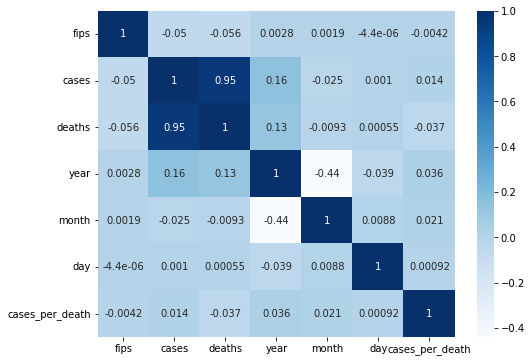

In [20]:
us_covid_df_heatmap = us_covid_df.corr()
plt.figure(figsize= (8,6));
sns.heatmap(us_covid_df_heatmap, annot = True, cmap = 'Blues')

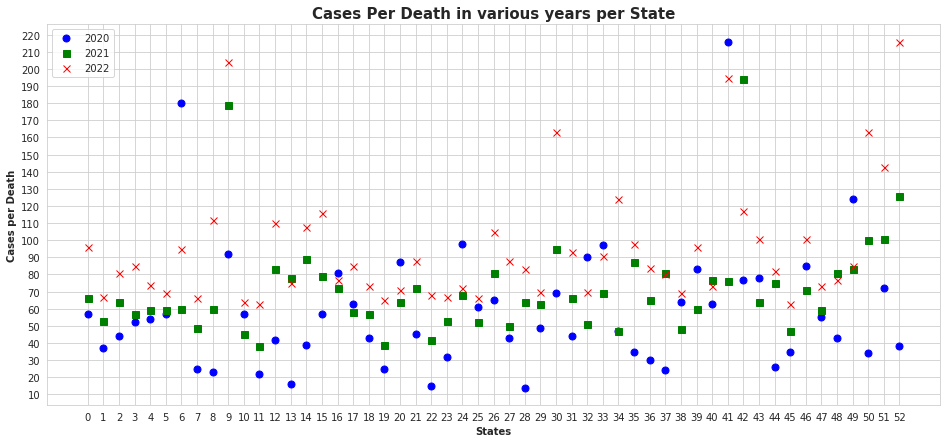

In [21]:
us_covid_df_2020 = us_covid_df[us_covid_df['year'] == 2020].sort_values(by = ['cases'], ascending = False)
us_covid_df_2020 = us_covid_df_2020.groupby(['state'], as_index = False, sort = False)[['cases', 'deaths']].sum()
us_covid_df_2020['cases_per_death'] = us_covid_df_2020.cases//us_covid_df_2020.deaths
us_covid_df_2020 = us_covid_df_2020.sort_values(by = ['cases_per_death'], ascending = False)
us_covid_df_2020
us_covid_df_2021 = us_covid_df[us_covid_df['year'] == 2021].sort_values(by = ['cases'], ascending = False)
us_covid_df_2021 = us_covid_df_2021.groupby(['state'], as_index = False, sort = False)[['cases', 'deaths']].sum()
us_covid_df_2021['cases_per_death'] = us_covid_df_2021.cases//us_covid_df_2021.deaths
us_covid_df_2021 = us_covid_df_2021.sort_values(by = ['cases_per_death'], ascending = False)
us_covid_df_2021
us_covid_df_2022 = us_covid_df[us_covid_df['year'] == 2022].sort_values(by = ['cases'], ascending = False)
us_covid_df_2022 = us_covid_df_2022.groupby(['state'], as_index = False, sort = False)[['cases', 'deaths']].sum()
us_covid_df_2022['cases_per_death'] = us_covid_df_2022.cases//us_covid_df_2022.deaths
us_covid_df_2022 = us_covid_df_2022.sort_values(by = ['cases_per_death'], ascending = False)
us_covid_df_2022
sns.set_style('whitegrid');
plt.figure(figsize= (16,7));
plt.title('Cases Per Death in various years per State',
          fontweight = 'bold',
          size = 15);
plt.xlabel('States',
           fontweight = 'bold',
          size = 10);
plt.ylabel('Cases per Death',
           fontweight = 'bold',
          size = 10);
plt.xticks(np.arange(0,53));
plt.yticks(np.arange(0,230, 10));
plt.plot(us_covid_df_2020['cases_per_death'], 'ob', ms = 7);
plt.plot(us_covid_df_2021['cases_per_death'], 'sg', ms = 7);
plt.plot(us_covid_df_2022['cases_per_death'], 'xr', ms = 7);
plt.legend(['2020', '2021', '2022']);

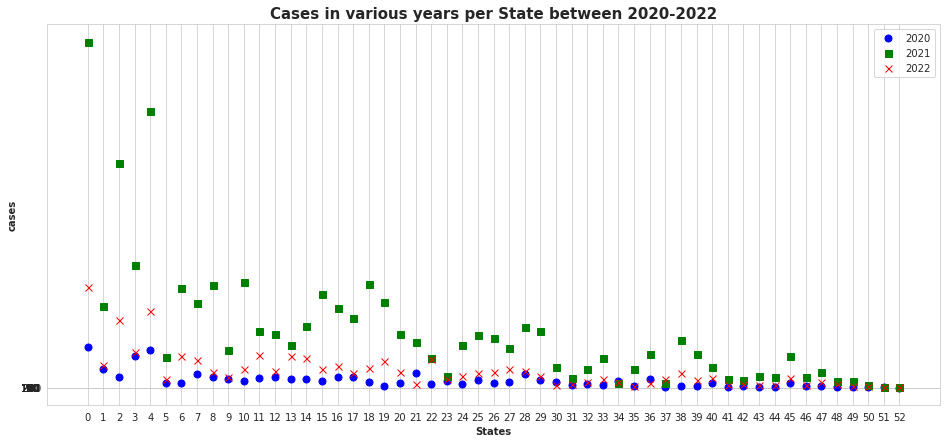

In [22]:
plt.figure(figsize = (16,7));
plt.title('Cases in various years per State between 2020-2022',
          fontweight = 'bold',
          size = 15);
plt.xlabel('States',
           fontweight = 'bold',
          size = 10);
plt.ylabel('cases',
           fontweight = 'bold',
          size = 10);
plt.xticks(np.arange(0,53));
plt.yticks(np.arange(0,230, 10));
plt.plot(us_covid_df_2020['cases'], 'ob', ms = 7);
plt.plot(us_covid_df_2021['cases'], 'sg', ms = 7);
plt.plot(us_covid_df_2022['cases'], 'xr', ms = 7);
plt.legend(['2020', '2021', '2022']);

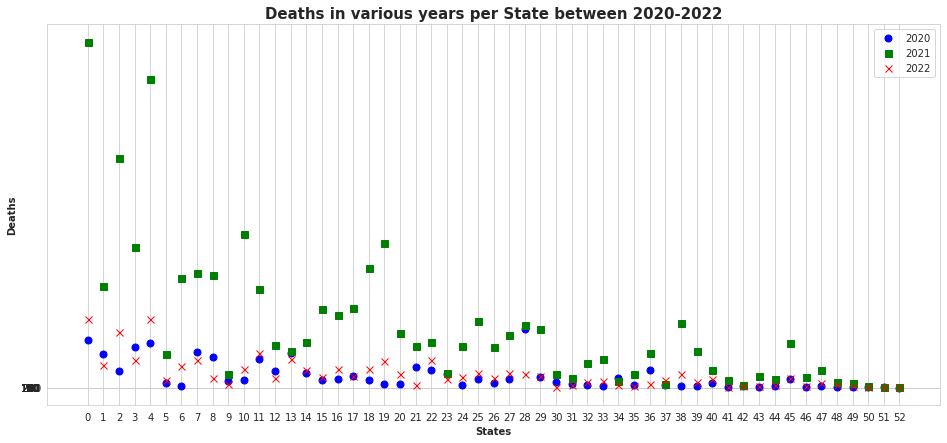

In [23]:
plt.figure(figsize = (16,7));
plt.title('Deaths in various years per State between 2020-2022',
          fontweight = 'bold',
          size = 15);
plt.xlabel('States',
           fontweight = 'bold',
          size = 10);
plt.ylabel('Deaths',
           fontweight = 'bold',
          size = 10);
plt.xticks(np.arange(0,53));
plt.yticks(np.arange(0,230, 10));
plt.plot(us_covid_df_2020['deaths'], 'ob', ms = 7);
plt.plot(us_covid_df_2021['deaths'], 'sg', ms = 7);
plt.plot(us_covid_df_2022['deaths'], 'xr', ms = 7);
plt.legend(['2020', '2021', '2022']);

### Defining a function to Call out state specific details.

In [34]:
us_states = us_covid_df.groupby('state', as_index =  False)['cases'].sum()
us_states = us_states.state.tolist()
us_states

# Function to call out the 10 max cases in whatever state you pic and plots it aswell
def state_county_max10(x):
  sns.set(rc={'figure.figsize':(13,6)})
  x = us_covid_df[us_covid_df['state'] == x]
  x = x.groupby(['county'], as_index= False)[['cases', 'deaths', 'month']].sum()
  x['cases_per_death'] = x.cases / x.deaths
  x = x.sort_values(by = 'cases', ascending = False).head(10)
  print(x)
  x = plt.bar(x= x.county, height = x.cases);
  return x

# Function to call out the 10 min cases in whatever state you pic and plots it aswell
def state_county_min10(x):
  sns.set(rc={'figure.figsize':(13,6)})
  x = us_covid_df[us_covid_df['state'] == x]
  x = x.groupby(['county'], as_index= False)[['cases', 'deaths', 'month']].sum()
  x['cases_per_death'] = x.cases / x.deaths
  x = x.sort_values(by = 'cases', ascending = True).head(10)
  print(x)
  x = plt.bar(x= x.county, height = x.cases);
  return x

# Function to call out the entire data which is sorted as per the state(Contains all county and total cases)
def state_county_total(x):
  sns.set(rc={'figure.figsize':(30,6)})
  x = us_covid_df[us_covid_df['state'] == x]
  x = x.groupby(['county'], as_index= False)[['cases', 'deaths', 'month']].sum()
  x['cases_per_death'] = x.cases / x.deaths
  x = x.sort_values(by = 'cases', ascending = False)
  print(x)
  x = plt.bar(x= x.county, height = x.cases);
  return x

In [93]:
us_states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

        county     cases    deaths  month  cases_per_death
36   Jefferson  46004385  768536.0   4722        59.859766
48      Mobile  27179322  490924.0   4704        55.363604
44     Madison  20604082  256599.0   4710        80.296813
62  Tuscaloosa  14755140  236574.0   4722        62.370083
57      Shelby  14596236  130696.0   4716       111.680817
..         ...       ...       ...    ...              ...
18       Coosa    644072   14612.0   4683        44.078292
52       Perry    637391   14130.0   4633        45.109059
59      Sumter    628692   18744.0   4671        33.540973
31      Greene    537099   18896.0   4680        28.423952
11     Choctaw    413294   13895.0   4683        29.744081

[67 rows x 5 columns]


<BarContainer object of 67 artists>

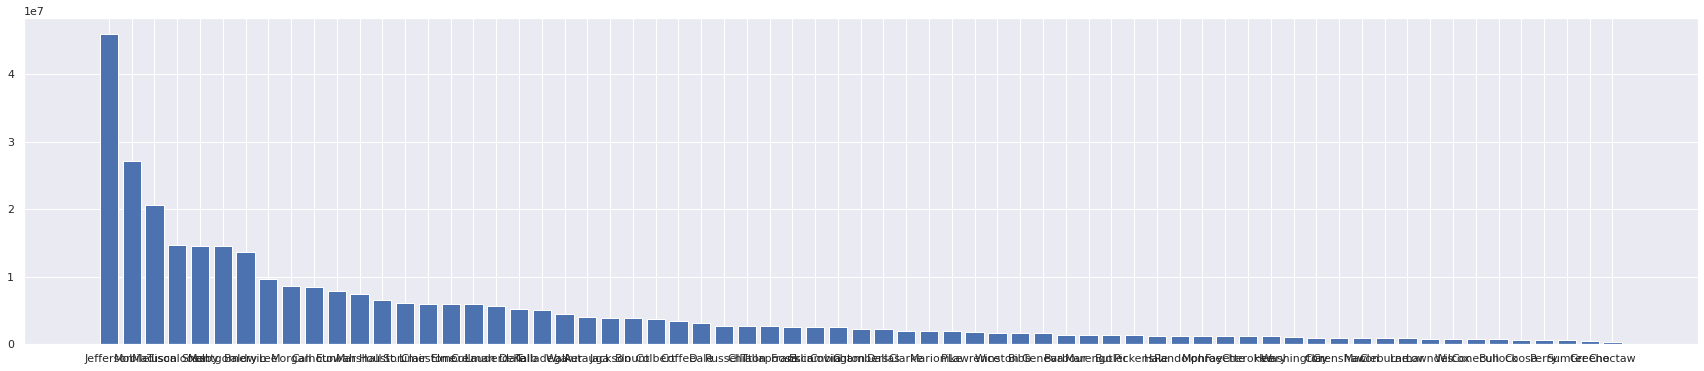

In [39]:
state_county_total('Alabama')

                                 county     cases  ...  month  cases_per_death
2                             Anchorage  19991760  ...   4725       176.188529
14            Matanuska-Susitna Borough   7043793  ...   4692       195.807772
7          Fairbanks North Star Borough   5149142  ...   4713       182.238259
10              Kenai Peninsula Borough   3379294  ...   4707       204.223968
3                    Bethel Census Area   2176102  ...   4641       210.454739
9               Juneau City and Borough   1231275  ...   4692       411.935430
12                Kodiak Island Borough    817576  ...   4605       288.081748
16                  North Slope Borough    803048  ...   4410       350.369983
13                 Kusilvak Census Area    764276  ...   4196       325.639540
17             Northwest Arctic Borough    572401  ...   4450       318.000556
11            Ketchikan Gateway Borough    532121  ...   4710       249.353796
15                     Nome Census Area    518440  .

<BarContainer object of 27 artists>

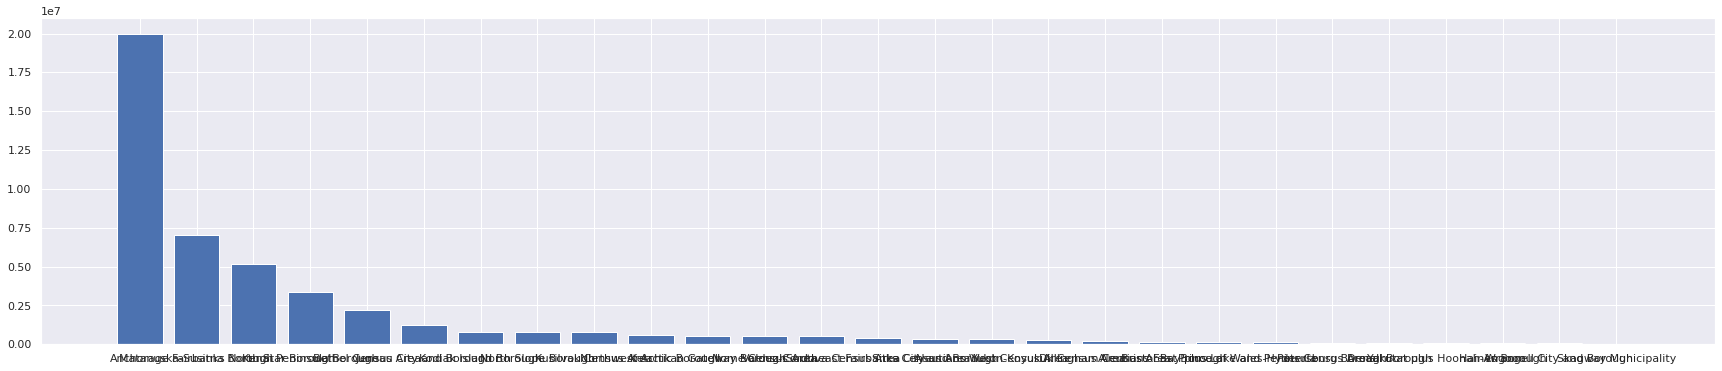

In [40]:
state_county_total('Alaska')

        county      cases     deaths  month  cases_per_death
7     Maricopa  312658486  5200648.0   4822        60.119140
10        Pima   62987072  1197069.0   4734        52.617746
11       Pinal   29985455   452336.0   4743        66.290225
14        Yuma   19798413   426588.0   4701        46.411088
8       Mohave   13229918   400872.0   4683        33.002849
13     Yavapai   11198128   281408.0   4704        39.793211
2     Coconino   10140699   177404.0   4707        57.161614
9       Navajo    9790832   294374.0   4710        33.259840
1      Cochise    6755016   150906.0   4698        44.763071
0       Apache    6317218   221216.0   4698        28.556786
12  Santa Cruz    4461230    88379.0   4704        50.478394
3         Gila    4027281   115616.0   4677        34.833250
4       Graham    3066671    47174.0   4719        65.007653
6       La Paz    1356546    39230.0   4683        34.579302
5     Greenlee     408183     6499.0   4671        62.807047


<BarContainer object of 15 artists>

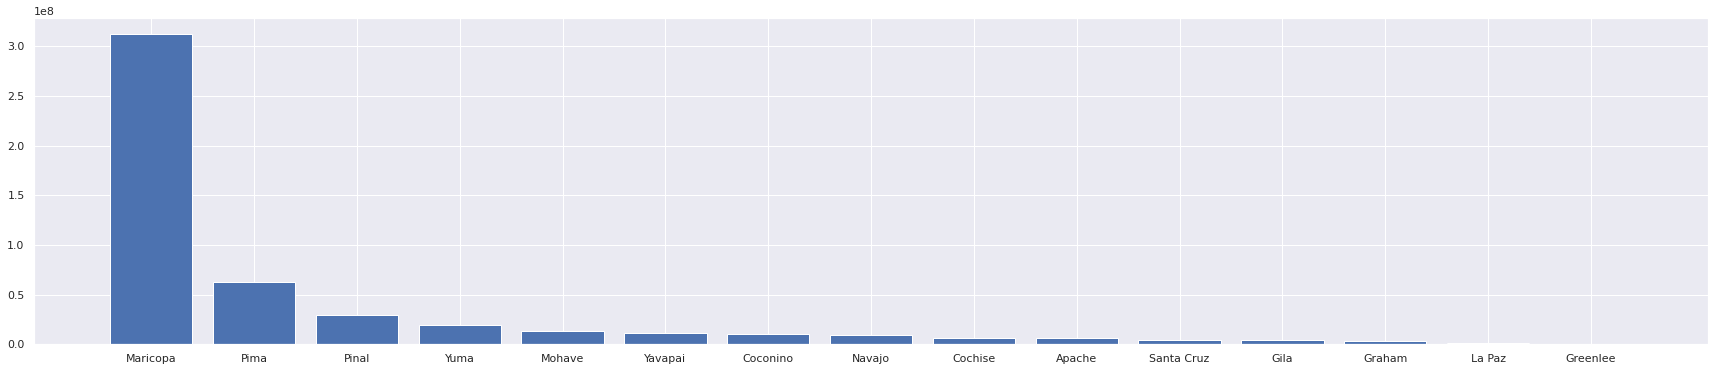

In [41]:
state_county_total('Arizona')

        county     cases    deaths  month  cases_per_death
59     Pulaski  23958508  354979.0   4725        67.492747
71  Washington  18298274  192386.0   4707        95.112295
3       Benton  16965332  231137.0   4704        73.399464
64   Sebastian   8848717  146890.0   4704        60.240432
15   Craighead   8501603   95852.0   4704        88.695103
..         ...       ...       ...    ...              ...
19      Dallas    445736    7792.0   4653        57.204312
48  Montgomery    427867   16881.0   4557        25.346070
73    Woodruff    393398    7070.0   4689        55.643281
36   Lafayette    324976    6926.0   4657        46.921167
6      Calhoun    227653    2224.0   4203       102.361960

[75 rows x 5 columns]


<BarContainer object of 75 artists>

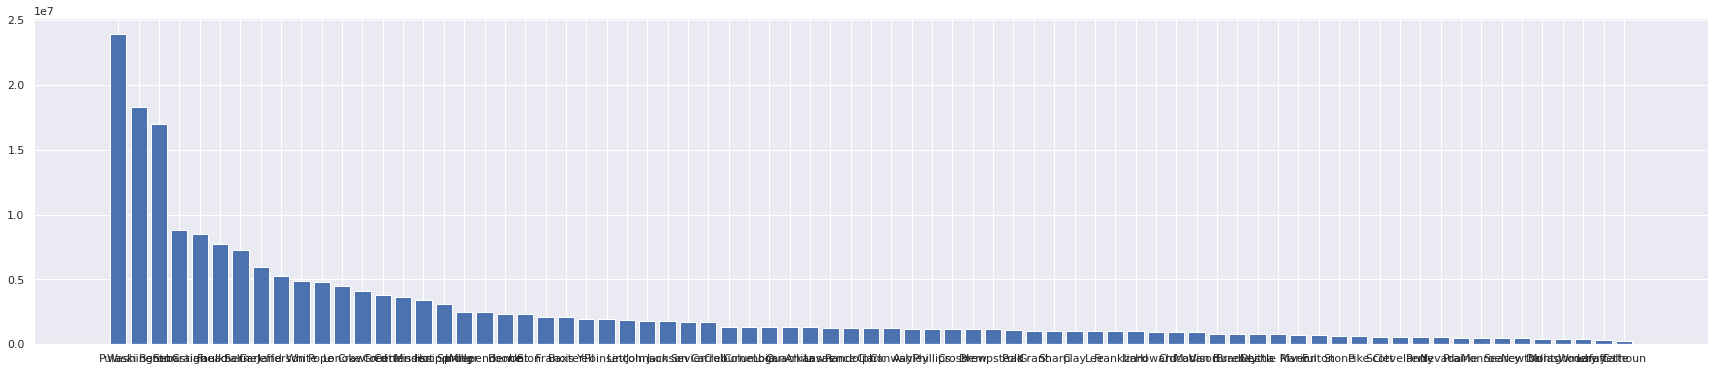

In [42]:
state_county_total('Arkansas')

             county      cases      deaths  month  cases_per_death
18      Los Angeles  675178433  11574798.0   4822     5.833177e+01
36        San Diego  162879144   1771940.0   4798     9.192137e+01
32        Riverside  160605696   2202949.0   4740     7.290486e+01
35   San Bernardino  156728435   2206012.0   4716     7.104605e+01
29           Orange  144638607   2334283.0   4823     6.196276e+01
42      Santa Clara   65347879    871385.0   4817     7.499312e+01
33       Sacramento   63451315    893646.0   4776     7.100274e+01
14             Kern   61236148    664124.0   4710     9.220590e+01
9            Fresno   59760487    835511.0   4740     7.152567e+01
0           Alameda   52321411    651159.0   4758     8.035121e+01
55          Ventura   43118011    461994.0   4731     9.333024e+01
38      San Joaquin   42281755    702316.0   4731     6.020332e+01
6      Contra Costa   41313988    402492.0   4752     1.026455e+02
49       Stanislaus   34987320    551532.0   4728     6.343661

<BarContainer object of 58 artists>

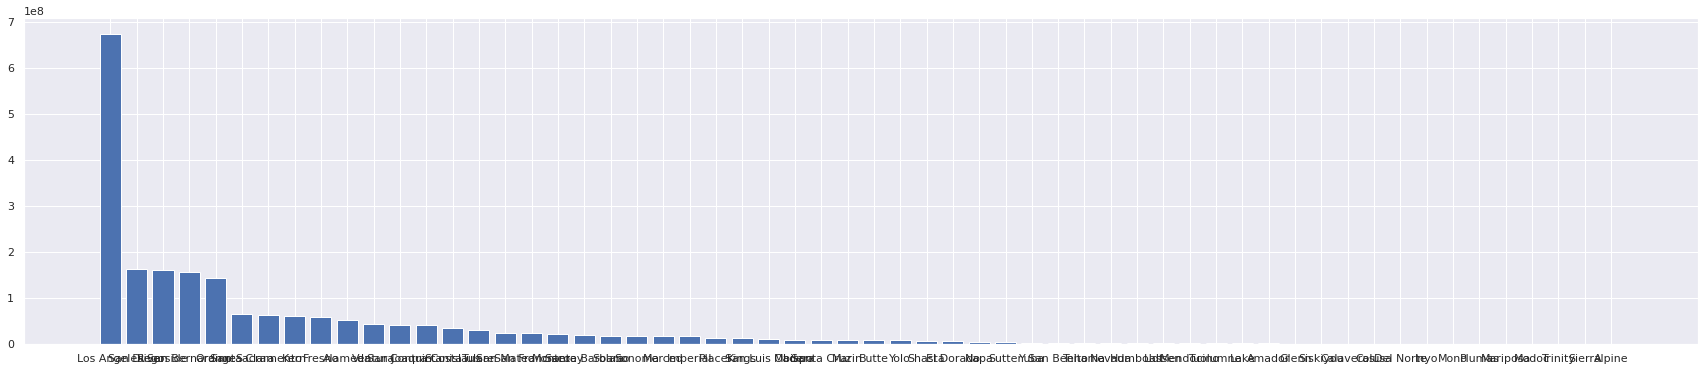

In [43]:
state_county_total('California')

       county     cases    deaths  month  cases_per_death
16     Denver  40360360  484792.0   4743        83.252941
20    El Paso  39475171  464972.0   4743        84.897953
2    Arapahoe  34602031  457578.0   4734        75.619962
0       Adams  32968549  402324.0   4725        81.945270
30  Jefferson  26551160  434302.0   4746        61.135247
..        ...       ...       ...    ...              ...
31      Kiowa     66651    1471.0   3538        45.309993
40    Mineral     51364     445.0   4674       115.424719
29    Jackson     37256       0.0   4246              inf
56   San Juan     35351      61.0   4520       579.524590
27   Hinsdale     19428       0.0   4698              inf

[64 rows x 5 columns]


<BarContainer object of 64 artists>

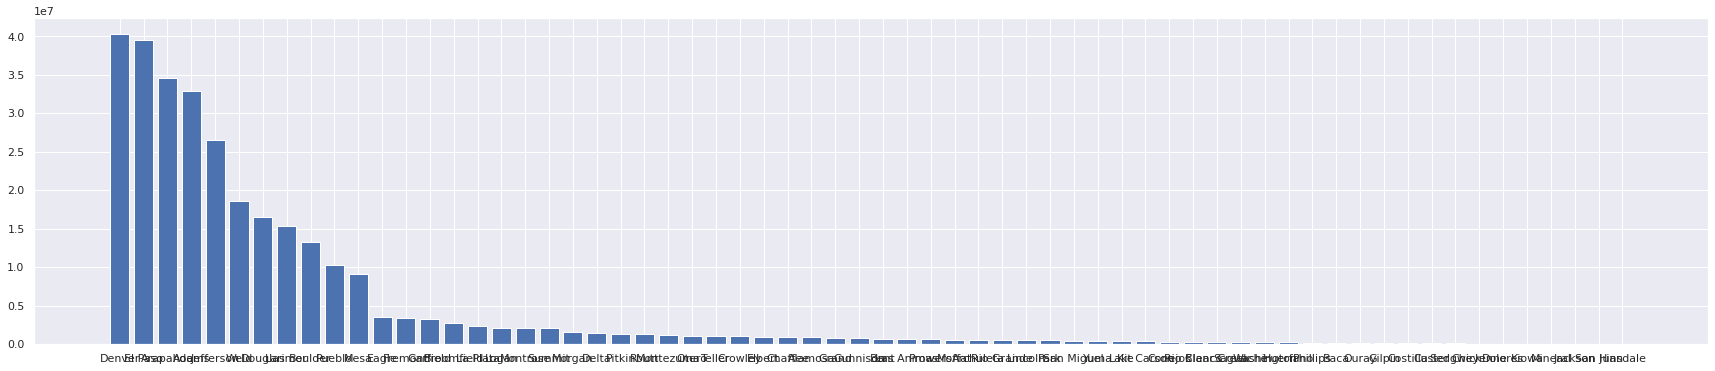

In [44]:
state_county_total('Colorado')

       county     cases     deaths  month  cases_per_death
0   Fairfield  52314070  1286755.0   4737        40.655812
4   New Haven  47419601  1181433.0   4719        40.137359
1    Hartford  44351207  1395450.0   4719        31.782727
5  New London  11903166   224168.0   4701        53.099309
2  Litchfield   7543236   168451.0   4725        44.780001
3   Middlesex   6586002   204892.0   4707        32.143773
7     Windham   5715375    90097.0   4704        63.435797
6     Tolland   4972323    96840.0   4704        51.345756


<BarContainer object of 8 artists>

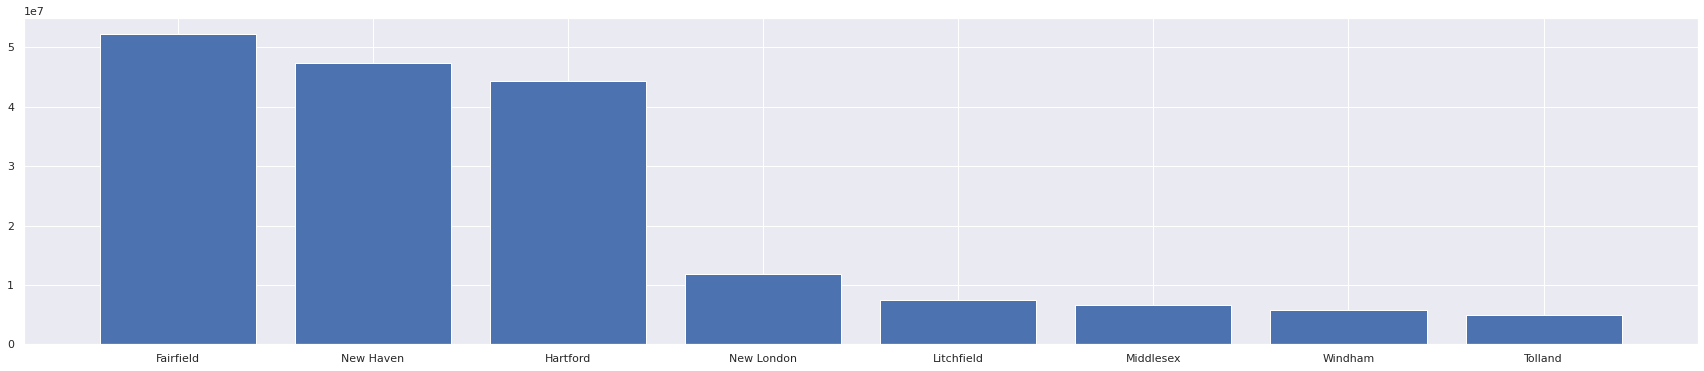

In [45]:
state_county_total('Connecticut')

       county     cases    deaths  month  cases_per_death
1  New Castle  34191683  447974.0   4728        76.325151
2      Sussex  15041964  278203.0   4710        54.068303
0        Kent  10458403  186790.0   4707        55.990165


<BarContainer object of 3 artists>

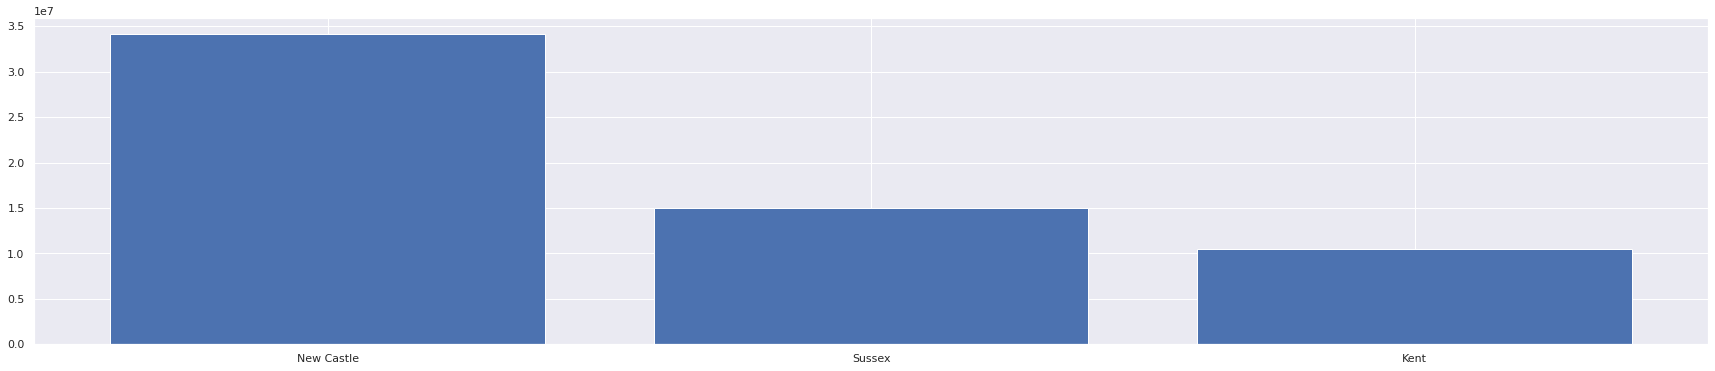

In [46]:
state_county_total('Delaware')

                 county     cases    deaths  month  cases_per_death
0  District of Columbia  29631793  621230.0   4740        47.698587


<BarContainer object of 1 artists>

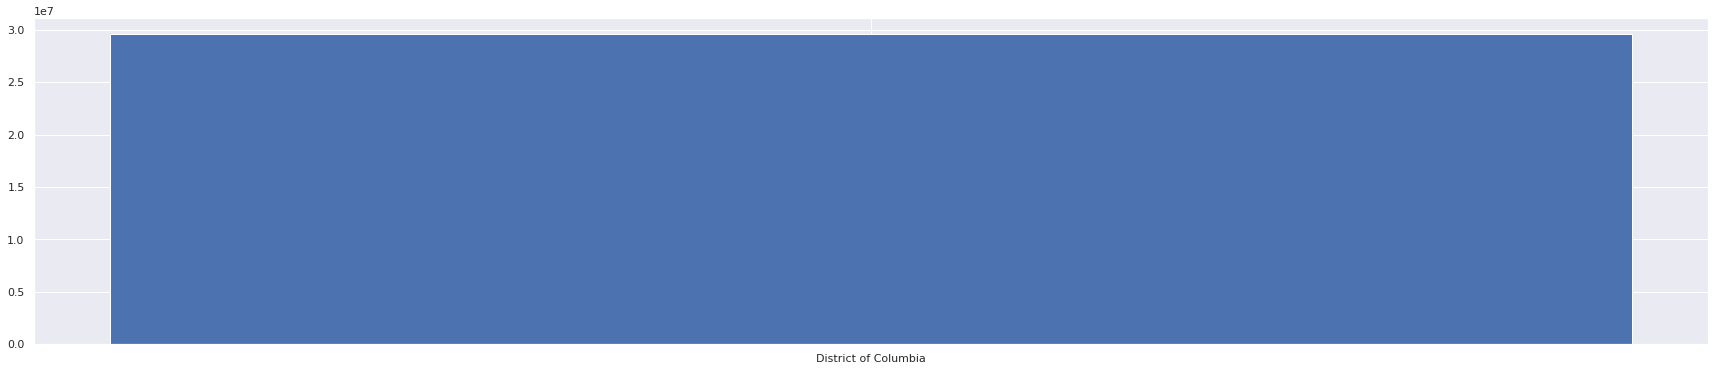

In [47]:
state_county_total('District of Columbia')

          county      cases     deaths  month  cases_per_death
42    Miami-Dade  288417367  3599217.0   4728        80.133364
5        Broward  144292503  1762636.0   4743        81.861770
49    Palm Beach   88767002  1641131.0   4725        54.088919
27  Hillsborough   88198835  1045071.0   4758        84.395065
47        Orange   86625790   756475.0   4722       114.512429
..           ...        ...        ...    ...              ...
32     Lafayette     985354    15877.0   4637        62.061725
31     Jefferson     948987    14274.0   4653        66.483607
17      Franklin     849361    12050.0   4657        70.486390
37       Liberty     712962     9313.0   4629        76.555567
20        Glades     604643    10580.0   4674        57.149622

[67 rows x 5 columns]


<BarContainer object of 67 artists>

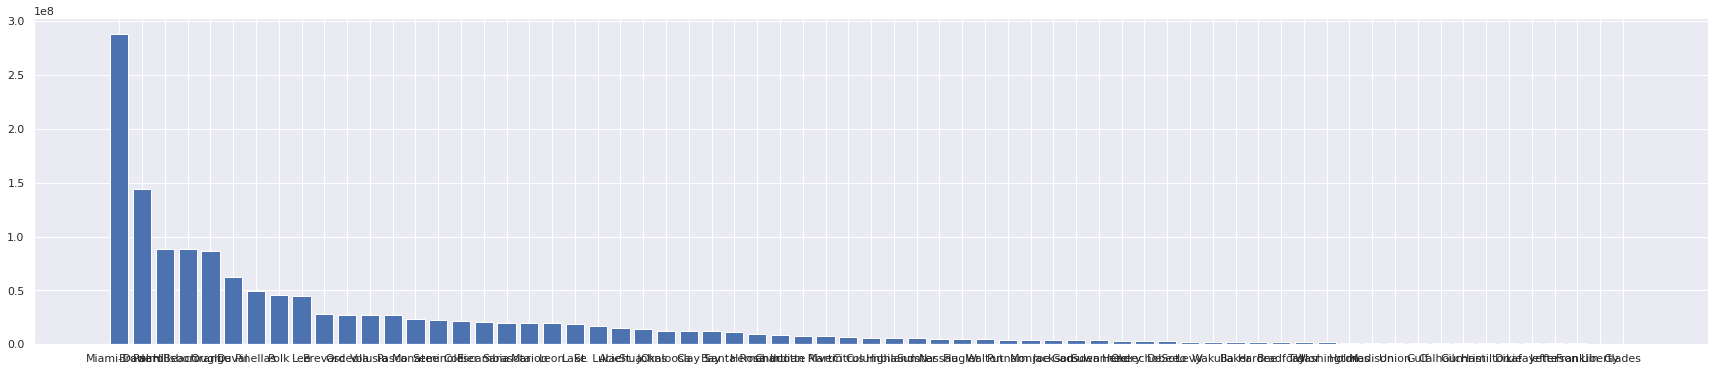

In [48]:
state_county_total('Florida')

         county     cases    deaths  month  cases_per_death
66     Gwinnett  55858504  606230.0   4740        92.140778
59       Fulton  55495911  755176.0   4755        73.487387
32         Cobb  44492048  580712.0   4740        76.616374
42       DeKalb  37813922  539147.0   4734        70.136571
27     Cherokee  17110316  172836.0   4737        98.997408
..          ...       ...       ...    ...              ...
3         Baker    147990    5607.0   4689        26.393793
29         Clay    146130    2072.0   4671        70.526062
117     Quitman    100242    1440.0   4657        69.612500
151     Webster     97268    2436.0   4668        39.929392
130  Taliaferro     66391    1093.0   4535        60.741995

[159 rows x 5 columns]


<BarContainer object of 159 artists>

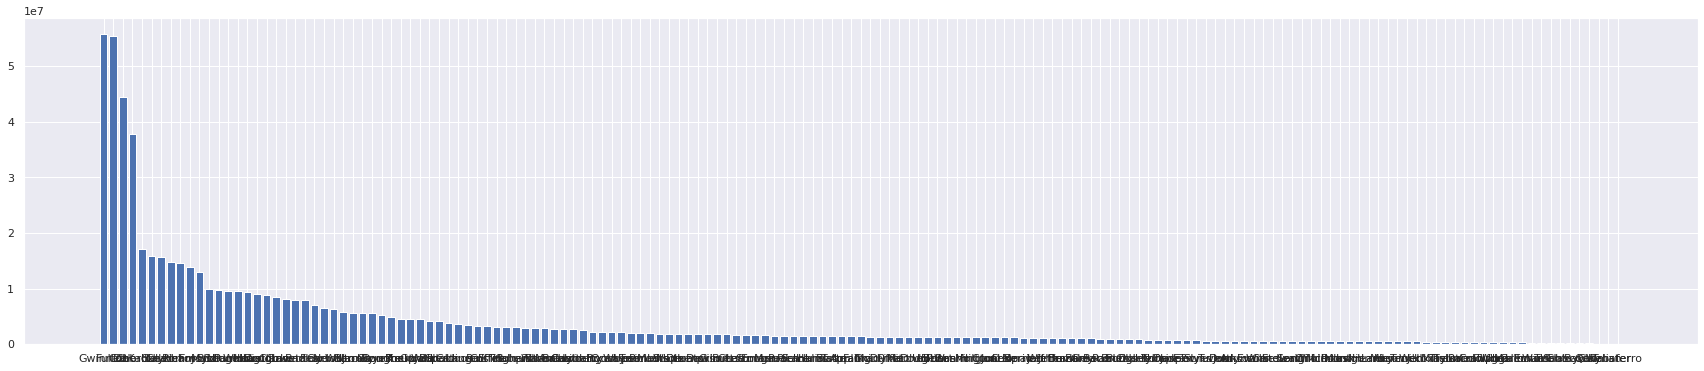

In [49]:
state_county_total('Georgia')

     county     cases    deaths  month  cases_per_death
1  Honolulu  22991680  241450.0   4743        95.223359
4      Maui   3650052   31377.0   4716       116.328903
0    Hawaii   3423138   39182.0   4710        87.365066
3     Kauai    902477    2887.0   4719       312.600277
2   Kalawao       443       0.0   2727              inf


<BarContainer object of 5 artists>

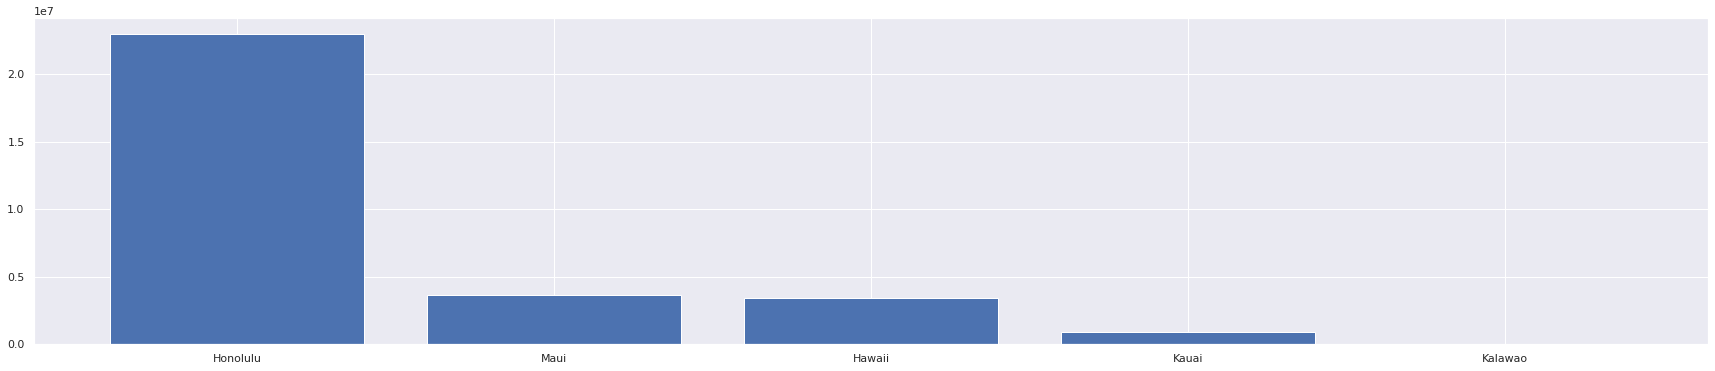

In [50]:
state_county_total('Hawaii')

        county     cases    deaths  month  cases_per_death
0          Ada  30729003  282469.0   4722       108.787170
13      Canyon  15997432  185220.0   4701        86.369895
27    Kootenai  10555018  132159.0   4701        79.866055
9   Bonneville   8067449   85612.0   4677        94.232689
41  Twin Falls   5906634   82106.0   4707        71.939127
2      Bannock   5048088   61617.0   4689        81.926871
32     Madison   3697757   13686.0   4710       270.185372
5      Bingham   2678784   41378.0   4701        64.739330
34   Nez Perce   2238699   37844.0   4686        59.155982
8       Bonner   1967755   30767.0   4671        63.956674
28       Latah   1739357    8927.0   4665       194.842276
25   Jefferson   1627814   15693.0   4686       103.728669
15      Cassia   1623794   15123.0   4689       107.372479
26      Jerome   1599080   16144.0   4671        99.051041
37     Payette   1537914   21793.0   4686        70.569174
6       Blaine   1378775   10421.0   4719       132.3073

<BarContainer object of 44 artists>

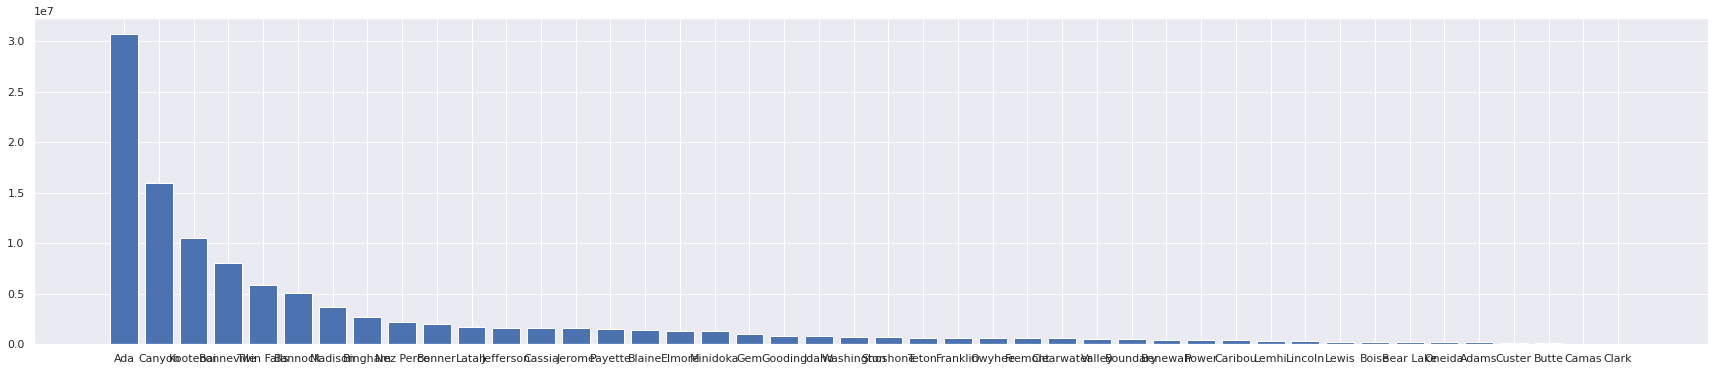

In [51]:
state_county_total('Idaho')

Empty DataFrame
Columns: [county, cases, deaths, month, cases_per_death]
Index: []


<BarContainer object of 0 artists>

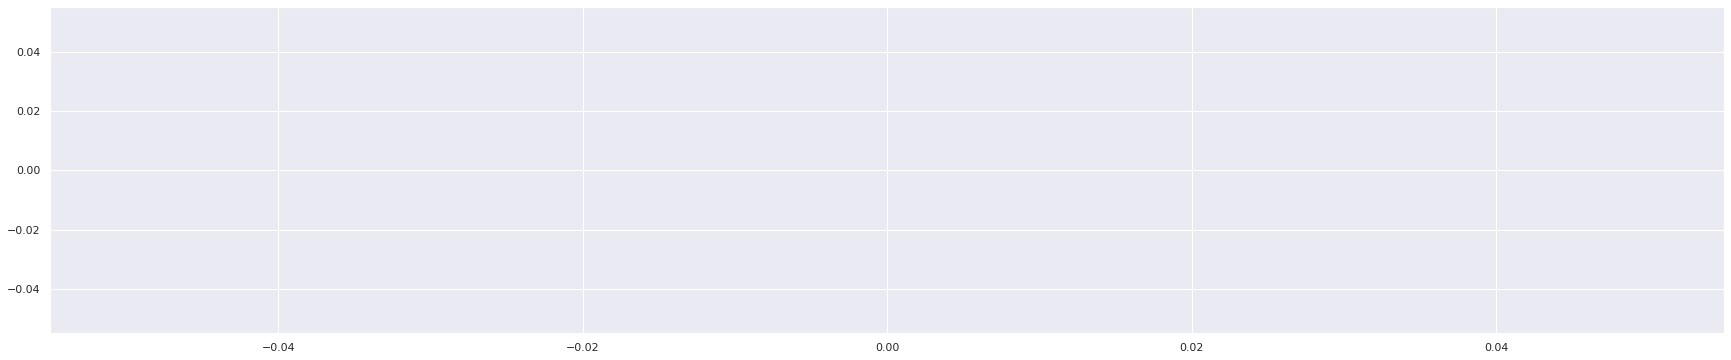

In [52]:
state_county_total('Ollinois')

         county     cases     deaths  month  cases_per_death
48       Marion  57998621  1042724.0   4743        55.622217
45         Lake  29838726   556895.0   4710        53.580524
1         Allen  24149335   379338.0   4701        63.661787
28     Hamilton  19826541   227014.0   4716        87.336204
73   St. Joseph  19309936   286201.0   4728        67.469841
..          ...       ...        ...    ...              ...
50       Martin    528638     7520.0   4653        70.297606
77  Switzerland    500204     4272.0   4677       117.088951
85       Warren    476627     7588.0   4683        62.813258
80        Union    448164     5564.0   4653        80.547088
57         Ohio    336750     6060.0   4689        55.569307

[92 rows x 5 columns]


<BarContainer object of 92 artists>

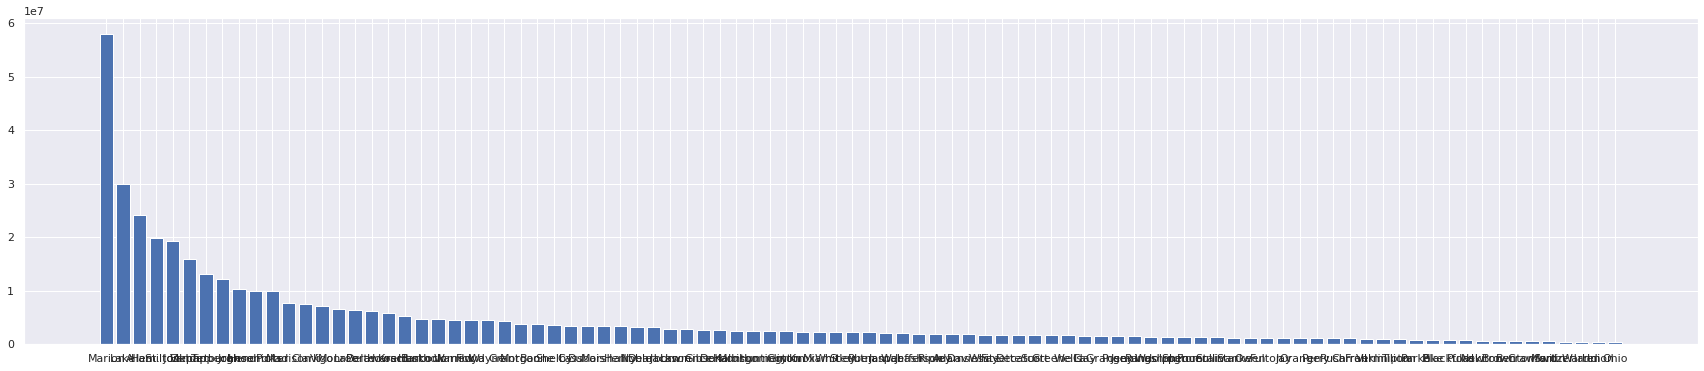

In [53]:
state_county_total('Indiana')

        county     cases    deaths  month  cases_per_death
76        Polk  32562717  344728.0   4716        94.459159
56        Linn  12466011  183999.0   4698        67.750428
81       Scott  10721492  117251.0   4695        91.440516
6   Black Hawk   9233801  161692.0   4710        57.107346
96    Woodbury   8723449  117280.0   4695        74.381386
..         ...       ...       ...    ...              ...
88   Van Buren    341257    8705.0   4671        39.202412
92       Wayne    306557   10943.0   4545        28.013982
79    Ringgold    292471   10681.0   4455        27.382361
4      Audubon    286506    5697.0   4671        50.290679
1        Adams    198768    2519.0   4465        78.907503

[99 rows x 5 columns]


<BarContainer object of 99 artists>

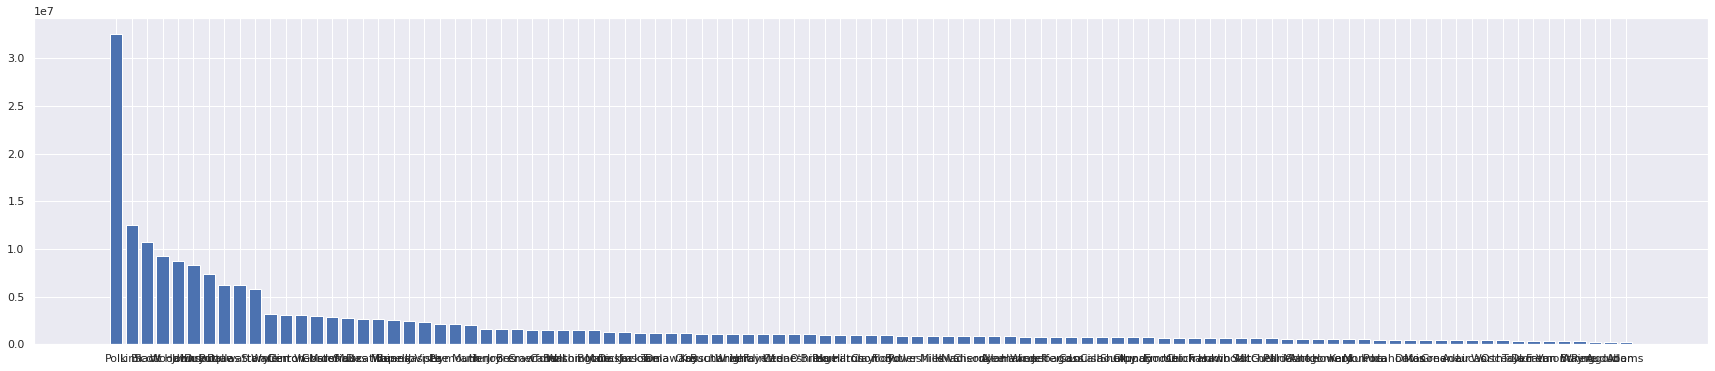

In [54]:
state_county_total('Iowa')

        county     cases    deaths  month  cases_per_death
55   Jefferson  48534042  657950.0   4737        73.765548
33     Fayette  20993452  161674.0   4743       129.850514
113     Warren   9914835   96006.0   4707       103.273077
58      Kenton   9794067  106301.0   4707        92.135229
7        Boone   8327559   74452.0   4683       111.851381
..         ...       ...       ...    ...              ...
82     Menifee    294783    7772.0   4689        37.928847
19    Carlisle    259363    4189.0   4577        61.915254
3      Ballard    254047    5849.0   4637        43.434262
52     Hickman    213313    6445.0   4585        33.097440
100  Robertson    131422    6357.0   4210        20.673588

[120 rows x 5 columns]


<BarContainer object of 120 artists>

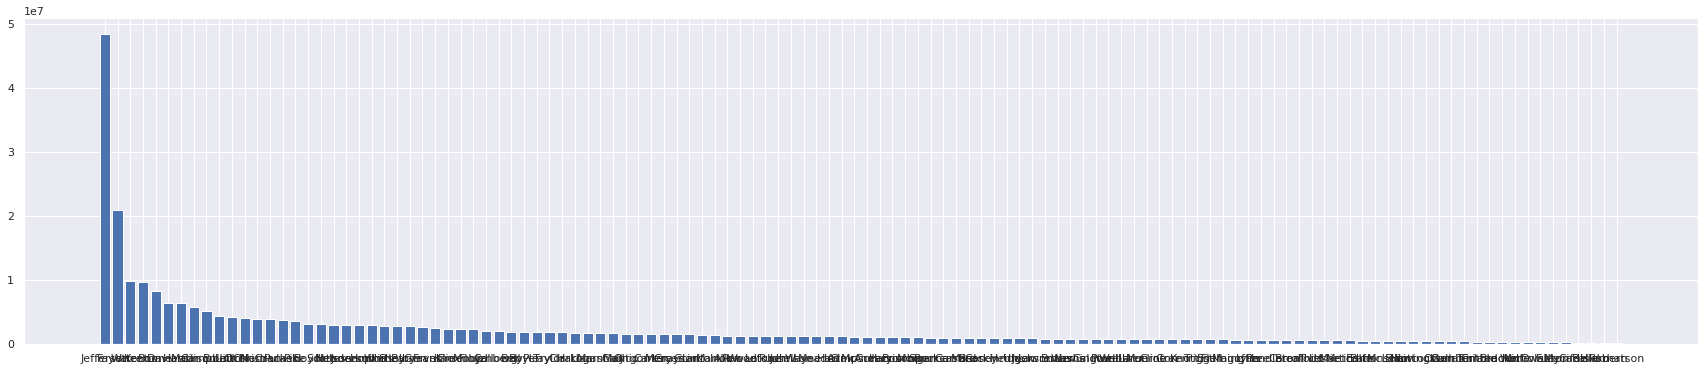

In [55]:
state_county_total('Kentucky')

              county     cases    deaths  month  cases_per_death
25         Jefferson  29596115  560939.0   4734        52.761735
16  East Baton Rouge  25932768  495588.0   4710        52.327272
35           Orleans  20530278  517946.0   4731        39.637873
51       St. Tammany  16715867  310098.0   4722        53.905111
8              Caddo  16406277  426453.0   4728        38.471478
..               ...       ...       ...    ...              ...
17      East Carroll    716204   12653.0   4677        56.603493
40         Red River    563261   21624.0   4674        26.047956
45        St. Helena    554349    6300.0   4668        87.991905
11           Cameron    350428    3273.0   4641       107.066300
53            Tensas    228251    3685.0   4625        61.940570

[64 rows x 5 columns]


<BarContainer object of 64 artists>

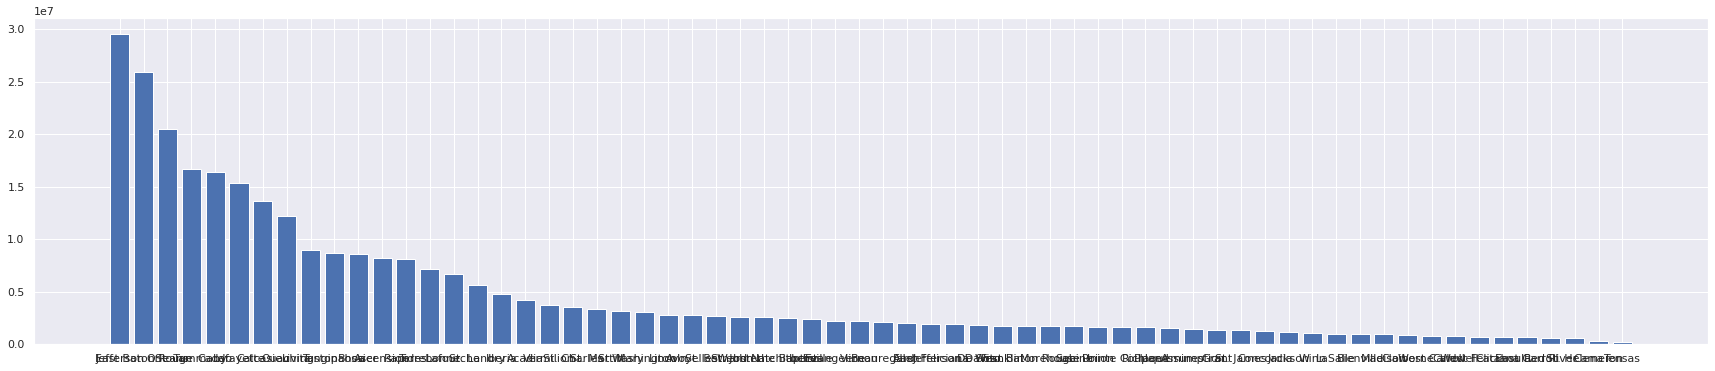

In [56]:
state_county_total('Louisiana')

          county    cases    deaths  month  cases_per_death
2     Cumberland  8987716  106303.0   4722        84.548094
15          York  7013470   65879.0   4710       106.459873
0   Androscoggin  4202330   43816.0   4725        95.908572
9      Penobscot  3986754   58076.0   4707        68.647186
5       Kennebec  3552781   41662.0   4710        85.276295
8         Oxford  1911139   30821.0   4710        62.007690
12      Somerset  1432698   19491.0   4674        73.505618
1      Aroostook  1423876   27339.0   4657        52.082227
4        Hancock   957915   19065.0   4665        50.244689
3       Franklin   846743    9462.0   4683        89.488797
13         Waldo   789786   15115.0   4689        52.251803
11     Sagadahoc   770572    4883.0   4698       157.807086
6           Knox   729723    4474.0   4692       163.103040
7        Lincoln   657765    2676.0   4716       245.801570
14    Washington   621633    9190.0   4657        67.642329
10   Piscataquis   403955    3844.0   45

<BarContainer object of 16 artists>

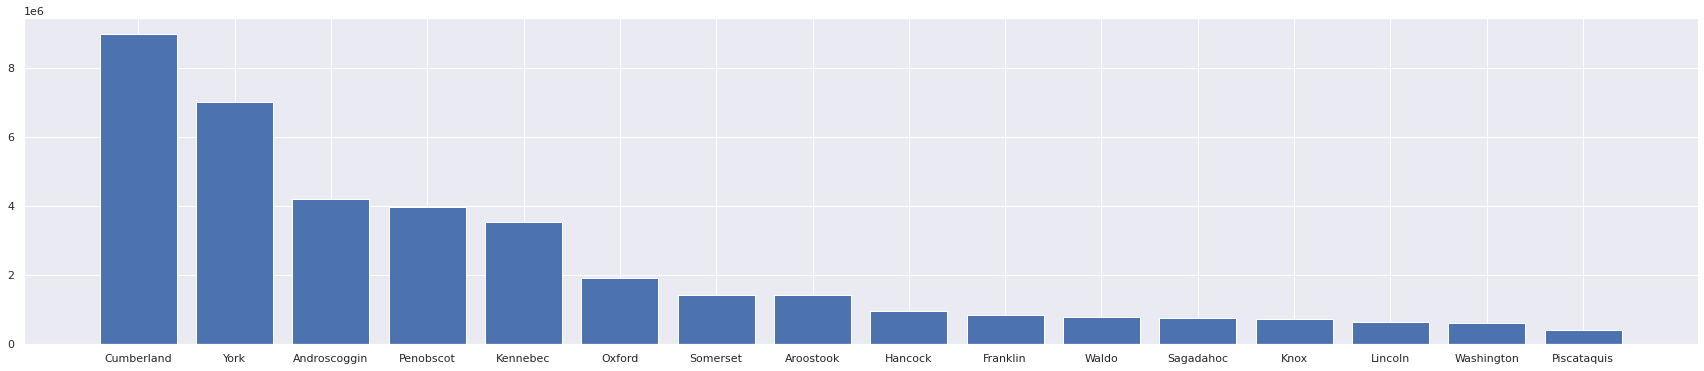

In [57]:
state_county_total('Maine')

             county     cases    deaths  month  cases_per_death
16  Prince George's  47104080  858025.0   4734        54.898261
15       Montgomery  40112446  875010.0   4746        45.842272
2         Baltimore  34596089  842127.0   4728        41.081795
3    Baltimore city  28329274  615428.0   4716        46.031825
1      Anne Arundel  23126764  346729.0   4722        66.699826
10        Frederick  10769225  178257.0   4713        60.414037
13           Howard  10433880  135954.0   4716        76.745664
12          Harford   8797584  153698.0   4737        57.239418
21       Washington   7940269  155781.0   4698        50.970715
8           Charles   6222667  116435.0   4722        53.443269
6           Carroll   5098836  140700.0   4719        36.239062
22         Wicomico   4541058   90805.0   4704        50.008898
0          Allegany   3913786  105942.0   4661        36.942723
19       St. Mary's   3755489   72551.0   4695        51.763435
7             Cecil   3499415   75664.0 

<BarContainer object of 24 artists>

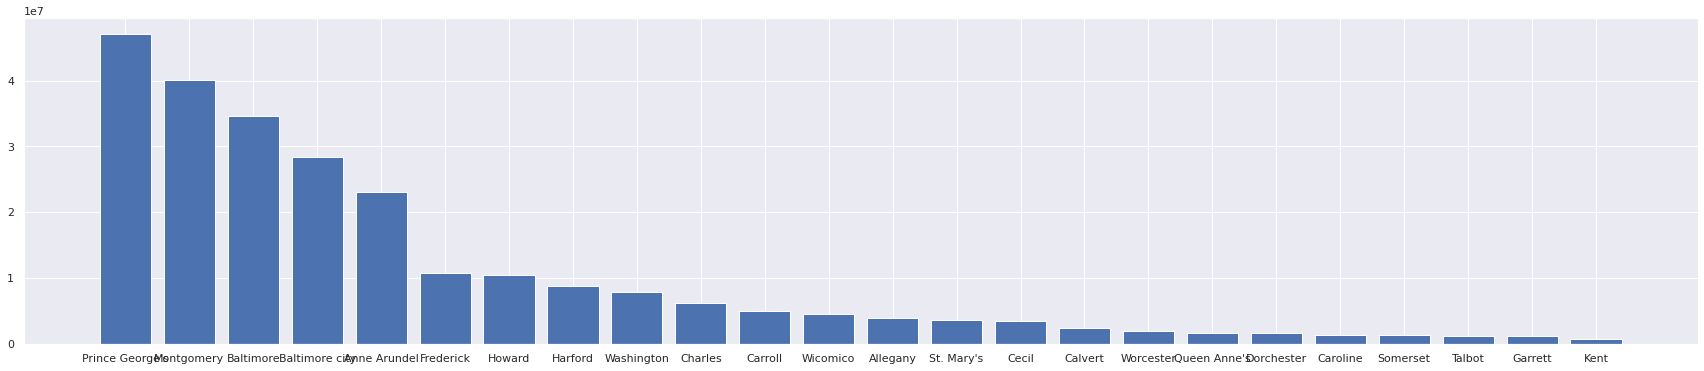

In [58]:
state_county_total('Maryland')

         county     cases     deaths  month  cases_per_death
81        Wayne  88769635  2947781.0   4731        30.114054
62      Oakland  63085143  1357948.0   4731        46.456229
49       Macomb  51824759  1333634.0   4722        38.859806
40         Kent  39111861   438187.0   4725        89.258378
24      Genesee  21912089   512302.0   4704        42.771820
..          ...       ...        ...    ...              ...
59  Montmorency    345237    10681.0   4617        32.322535
67       Oscoda    341672    14302.0   4668        23.889806
74  Schoolcraft    288616     2693.0   4637       107.172670
65    Ontonagon    254478    10243.0   4189        24.844089
41     Keweenaw    103215     1945.0   4336        53.066838

[83 rows x 5 columns]


<BarContainer object of 83 artists>

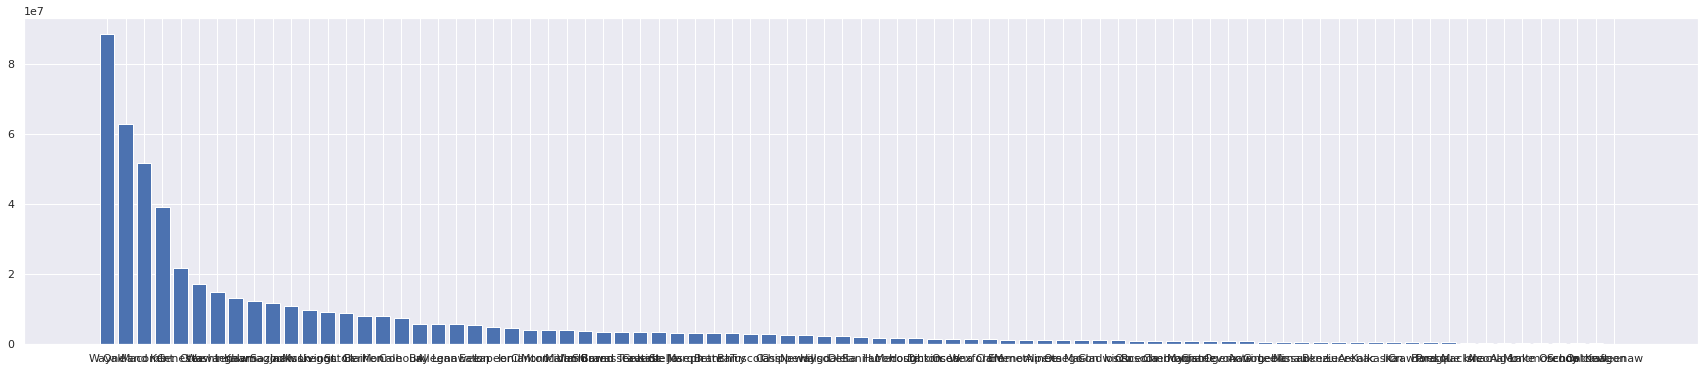

In [59]:
state_county_total('Michigan')

               county     cases    deaths  month  cases_per_death
26           Hennepin  69477839  996159.0   4725        69.745732
61             Ramsey  28953042  473464.0   4743        61.151517
18             Dakota  25133126  239411.0   4725       104.978994
1               Anoka  23231769  243546.0   4731        95.389655
81         Washington  14968448  148422.0   4716       100.850602
..                ...       ...       ...    ...              ...
34            Kittson    257578    9907.0   4597        25.999596
62           Red Lake    230457    3428.0   4621        67.227830
77           Traverse    200860    2376.0   4668        84.537037
38  Lake of the Woods    173623    1539.0   4042       112.815465
15               Cook     99916     143.0   4318       698.713287

[87 rows x 5 columns]


<BarContainer object of 87 artists>

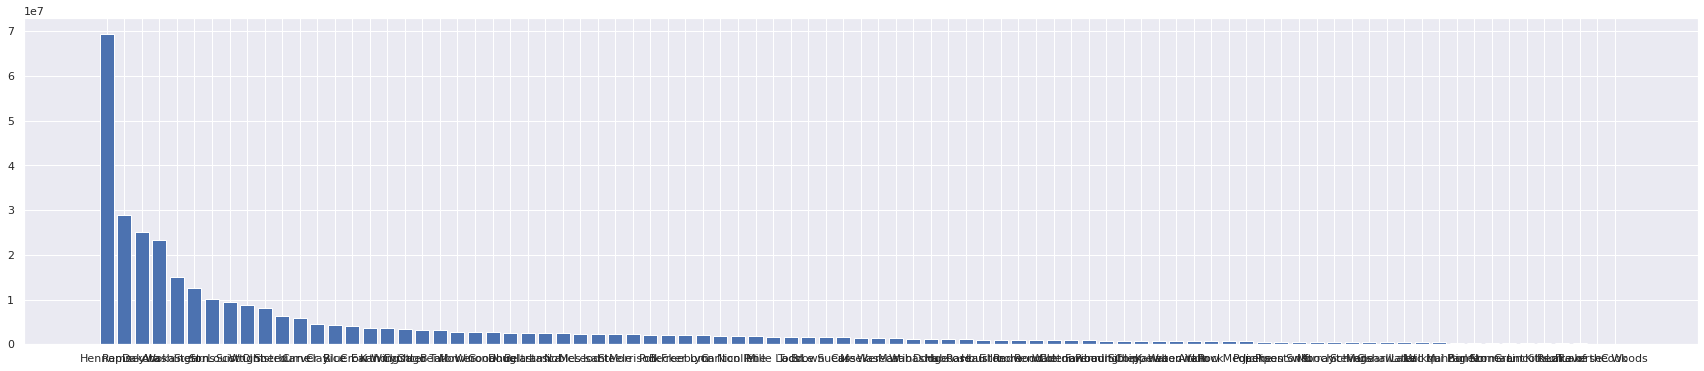

In [60]:
state_county_total('Minnesota')

       county     cases    deaths  month  cases_per_death
24      Hinds  12990827  243313.0   4716        53.391422
16     DeSoto  12798311  148802.0   4707        86.008999
23   Harrison  11999708  182848.0   4710        65.626684
29    Jackson   8853471  140746.0   4710        62.903891
60     Rankin   8520681  151264.0   4701        56.329867
..        ...       ...       ...    ...              ...
59    Quitman    472055    9474.0   4683        49.826367
78  Wilkinson    445634   17899.0   4704        24.897145
31  Jefferson    397228   14250.0   4680        27.875649
62    Sharkey    291560    9909.0   4680        29.423756
27  Issaquena     93214    3245.0   4246        28.725424

[82 rows x 5 columns]


<BarContainer object of 82 artists>

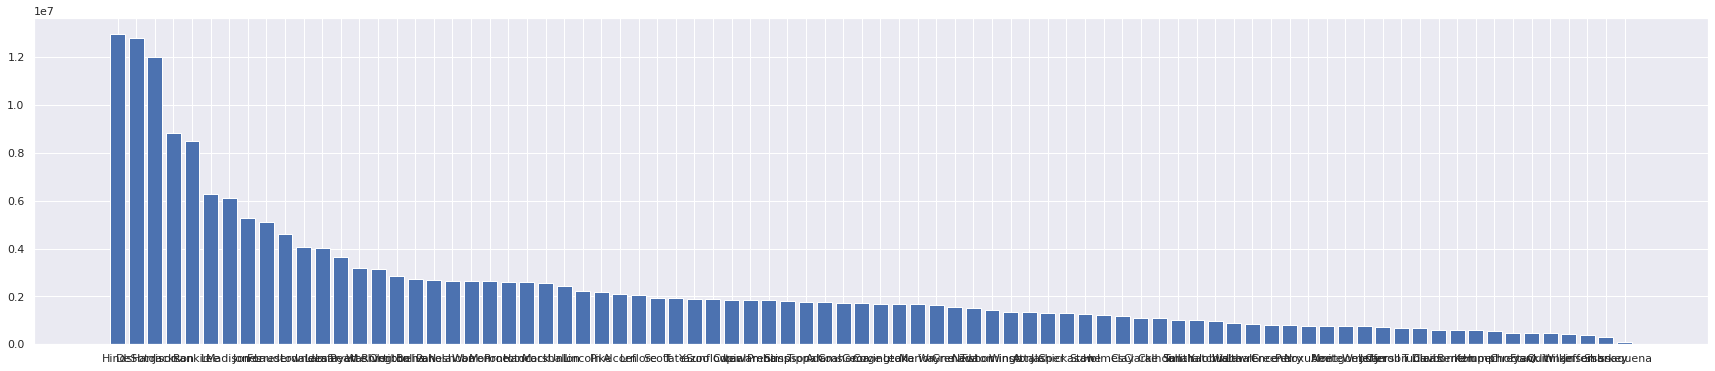

In [61]:
state_county_total('Mississippi')

             county     cases     deaths  month  cases_per_death
100       St. Louis  56400532  1166751.0   4740        48.339819
97      St. Charles  26075879   281573.0   4707        92.607881
47          Jackson  22495806   269256.0   4710        83.548021
38           Greene  17904306   269175.0   4725        66.515486
101  St. Louis city  14298179   273334.0   4707        52.310283
..              ...       ...        ...    ...              ...
51             Knox    207769     1861.0   4336       111.643740
92         Schuyler    177966     4204.0   4470        42.332540
93         Scotland    167907     3008.0   4641        55.820146
64           Mercer    163134     1789.0   4395        91.187255
113           Worth     97454      833.0   4645       116.991597

[115 rows x 5 columns]


<BarContainer object of 115 artists>

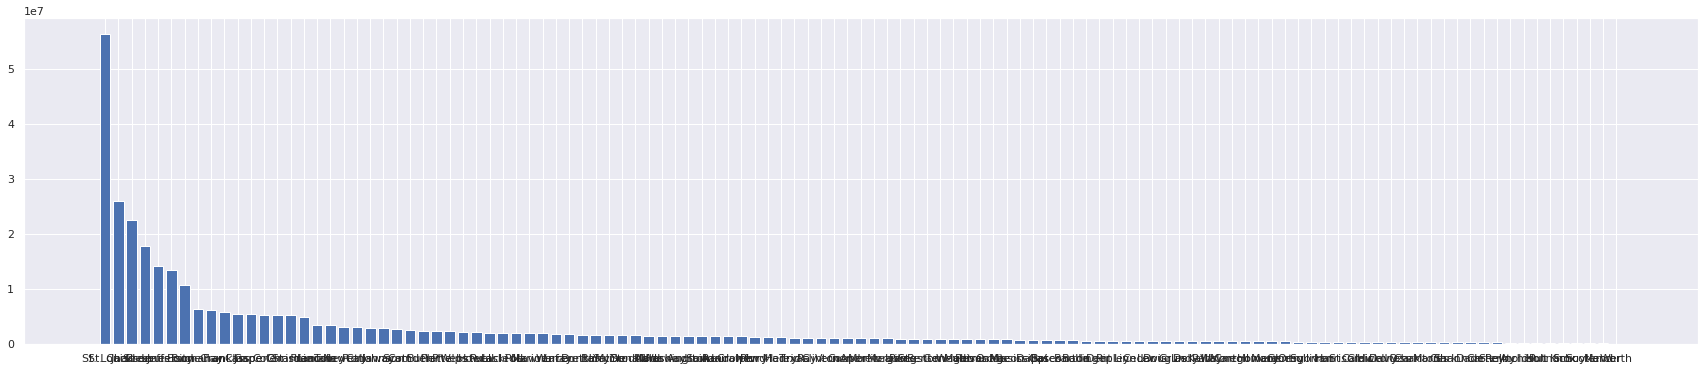

In [62]:
state_county_total('Missouri')

             county     cases    deaths  month  cases_per_death
55      Yellowstone  10593763  149208.0   4722        70.999966
15         Gallatin   8131313   32467.0   4722       250.448548
14         Flathead   7037747   60163.0   4704       116.977993
31         Missoula   5692128   54750.0   4719       103.965808
6           Cascade   5432118   90150.0   4698        60.256439
24  Lewis and Clark   3997534   44070.0   4722        90.708736
46       Silver Bow   2207150   40281.0   4722        54.793823
40          Ravalli   1773623   27240.0   4698        65.110977
1          Big Horn   1395687   37851.0   4629        36.873187
23             Lake   1380099   21677.0   4680        63.666513
20             Hill   1175723   23881.0   4686        49.232570
26          Lincoln   1064638   15783.0   4683        67.454730
17          Glacier    910264   20812.0   4657        43.737459
42        Roosevelt    896586   27105.0   4704        33.078251
33             Park    840528    9239.0 

<BarContainer object of 56 artists>

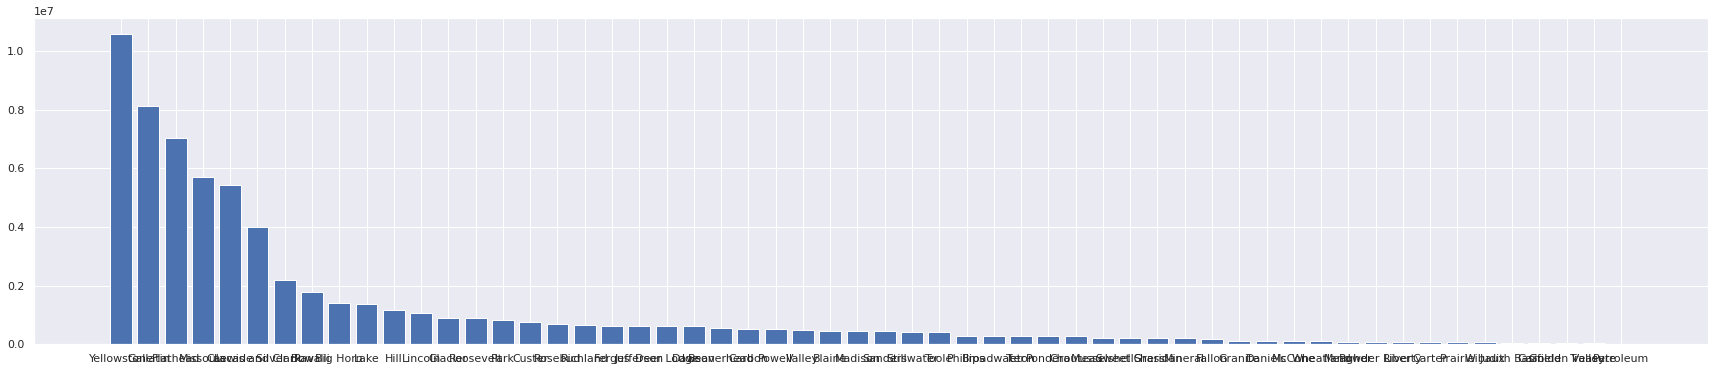

In [63]:
state_county_total('Montana')

       county     cases    deaths  month  cases_per_death
27    Douglas  39119885  367810.0   4784       106.358949
54  Lancaster  17907554  123389.0   4701       145.130879
76      Sarpy  12264357   68002.0   4710       180.352887
39       Hall   4443072   62206.0   4683        71.425136
9     Buffalo   3123132   29436.0   4701       106.099062
..        ...       ...       ...    ...              ...
82      Sioux     20698     274.0   4322        75.540146
3      Banner     20418     209.0   4342        97.693780
59  McPherson     17734     410.0   4147        43.253659
4      Blaine     14359     206.0   3529        69.703883
2      Arthur     11180     367.0   3953        30.463215

[93 rows x 5 columns]


<BarContainer object of 93 artists>

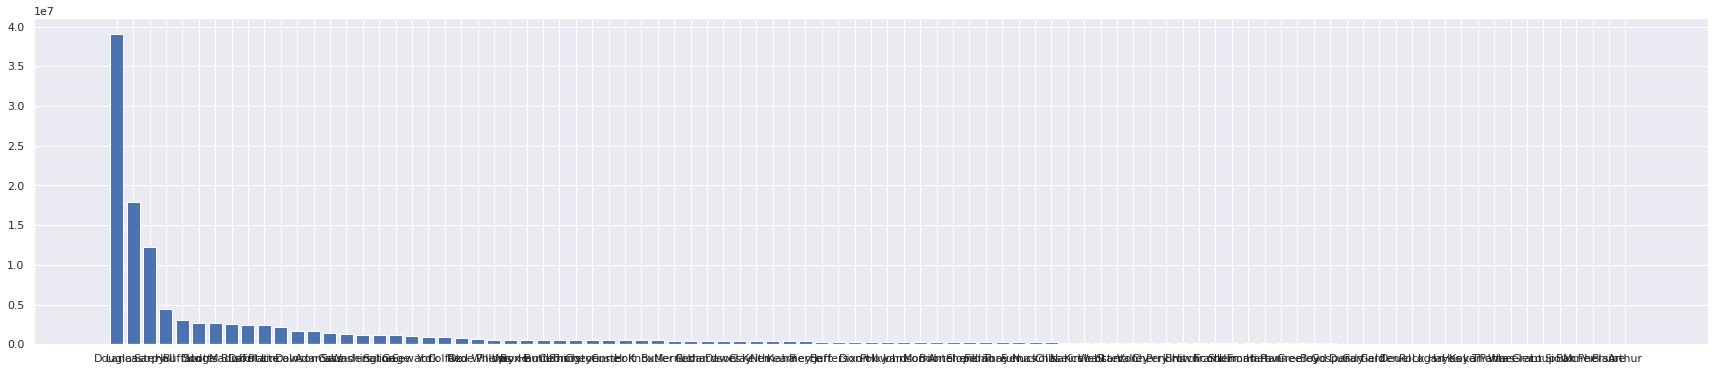

In [64]:
state_county_total('Nebraska')

         county      cases     deaths  month  cases_per_death
2         Clark  141637630  2376840.0   4746        59.590730
15       Washoe   26477548   369469.0   4746        71.663788
0   Carson City    3539902    60807.0   4725        58.215370
4          Elko    3105498    35262.0   4704        88.069253
10         Lyon    2202481    38783.0   4686        56.789856
12          Nye    1751850    57804.0   4701        30.306726
3       Douglas    1740808    20319.0   4692        85.673901
1     Churchill    1322144    26970.0   4617        49.022766
7      Humboldt     857632    10616.0   4677        80.786737
13     Pershing     452484     9480.0   4410        47.730380
16   White Pine     411124     4207.0   4633        97.723794
8        Lander     284724     5263.0   4585        54.099183
9       Lincoln     222978     1453.0   4510       153.460427
11      Mineral     196704     3963.0   4597        49.635125
14       Storey      70346     1885.0   4460        37.318833
6       

<BarContainer object of 17 artists>

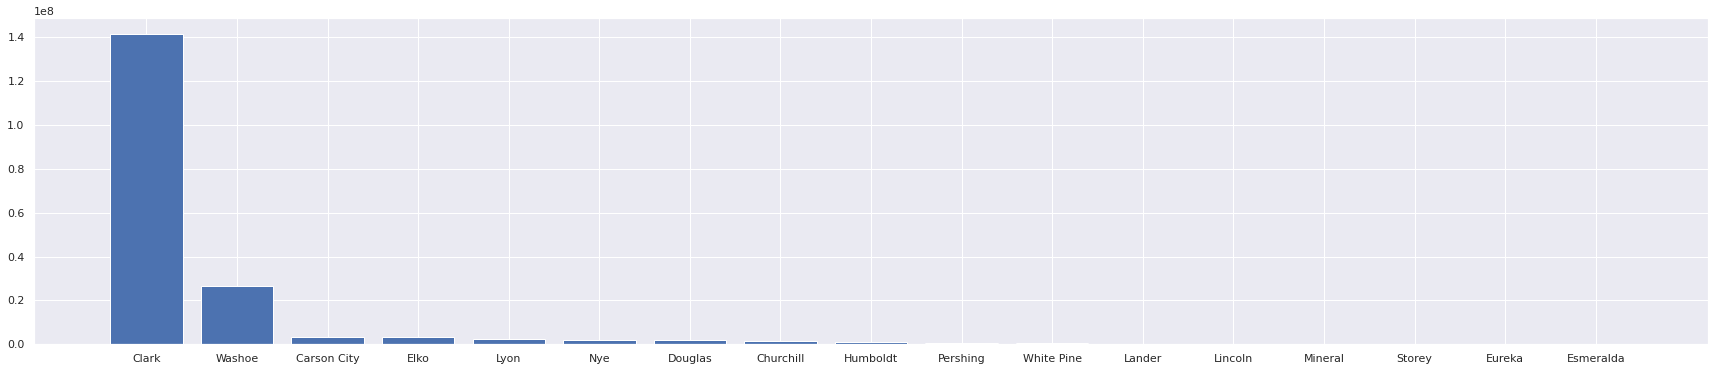

In [65]:
state_county_total('Nevada')

         county     cases    deaths  month  cases_per_death
5  Hillsborough  19878759  343728.0   4716        57.832818
7    Rockingham  13162261  144969.0   4740        90.793625
6     Merrimack   5634871   60186.0   4707        93.624281
8     Strafford   5337748   48798.0   4698       109.384565
4       Grafton   2439139   13020.0   4755       187.337865
0       Belknap   2424380   48823.0   4707        49.656514
2      Cheshire   2297501   19208.0   4701       119.611672
1       Carroll   1512778    7531.0   4713       200.873456
9      Sullivan   1298396   13651.0   4695        95.113618
3          Coos   1186403   22223.0   4657        53.386266


<BarContainer object of 10 artists>

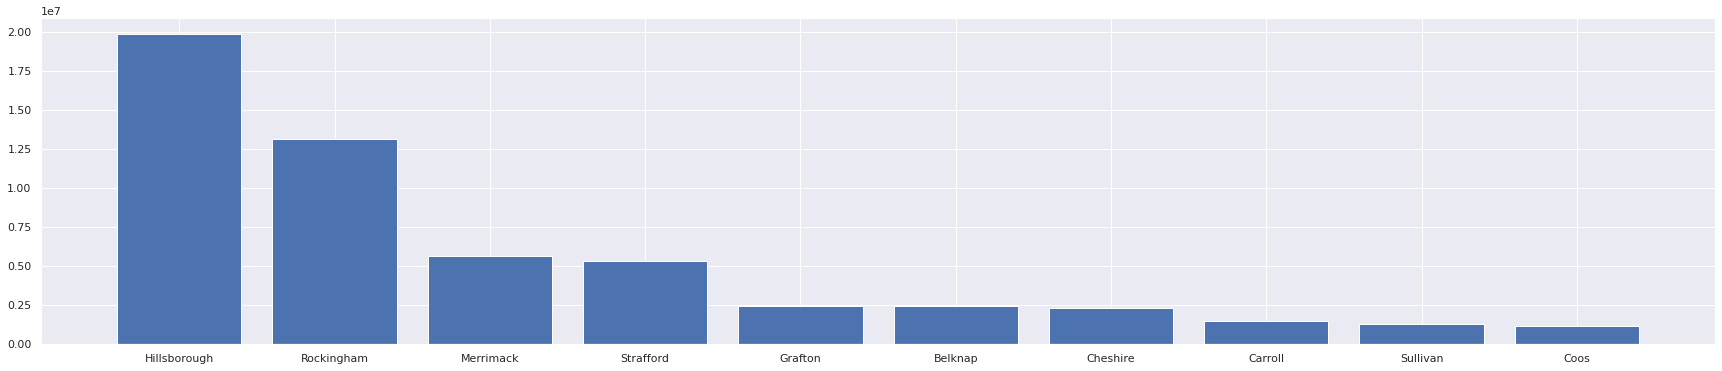

In [66]:
state_county_total('New Hampshire')

        county     cases     deaths  month  cases_per_death
1       Bergen  55072763  1711093.0   4749        32.185722
6        Essex  51148146  1780014.0   4725        28.734687
11   Middlesex  48719252  1324465.0   4728        36.784099
8       Hudson  46077804  1321332.0   4734        34.872238
14       Ocean  40270609  1168900.0   4722        34.451714
12    Monmouth  39773343   891971.0   4734        44.590399
15     Passaic  38976435  1105966.0   4737        35.241983
19       Union  38221324  1154342.0   4734        33.110919
3       Camden  29898807   702155.0   4743        42.581491
13      Morris  26485953   723700.0   4725        36.597973
2   Burlington  23799278   485060.0   4731        49.064606
10      Mercer  18686464   557688.0   4719        33.507022
0     Atlantic  16385875   352932.0   4707        46.427853
7   Gloucester  16260708   333231.0   4710        48.797105
17    Somerset  15948845   491806.0   4713        32.429139
5   Cumberland   9233510   220671.0   47

<BarContainer object of 21 artists>

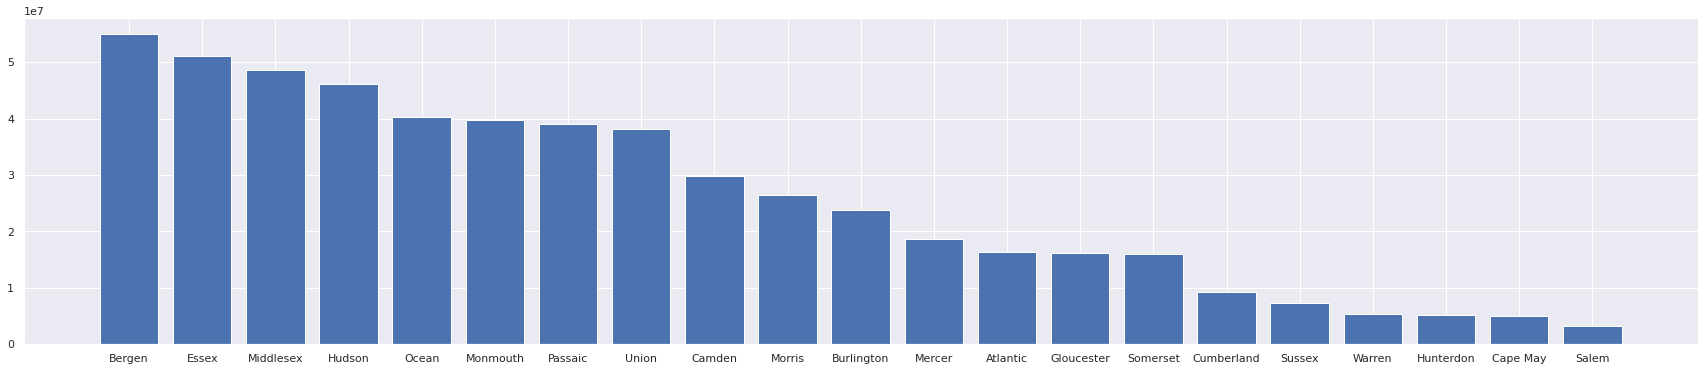

In [67]:
state_county_total('New Jersey')

        county     cases    deaths  month  cases_per_death
0   Bernalillo  32872353  483810.0   4728        67.944757
7     Doña Ana  14074812  225526.0   4701        62.408822
23    San Juan   9150808  263601.0   4695        34.714618
17    McKinley   7163066  256732.0   4701        27.900947
25    Sandoval   6963040  117014.0   4719        59.506042
26    Santa Fe   5965652   70876.0   4728        84.170269
13         Lea   5388515   94573.0   4698        56.977309
2       Chaves   5303356   82300.0   4692        64.439320
8         Eddy   4097140   72274.0   4686        56.688989
32    Valencia   4083938   58575.0   4680        69.721519
19       Otero   3294588   42619.0   4665        77.303268
5        Curry   3067875   43183.0   4689        71.043582
21  Rio Arriba   2088689   36501.0   4686        57.222788
3       Cibola   1955872   59460.0   4689        32.893912
16        Luna   1780875   40087.0   4629        44.425250
22   Roosevelt   1153970   27622.0   4680        41.7772

<BarContainer object of 33 artists>

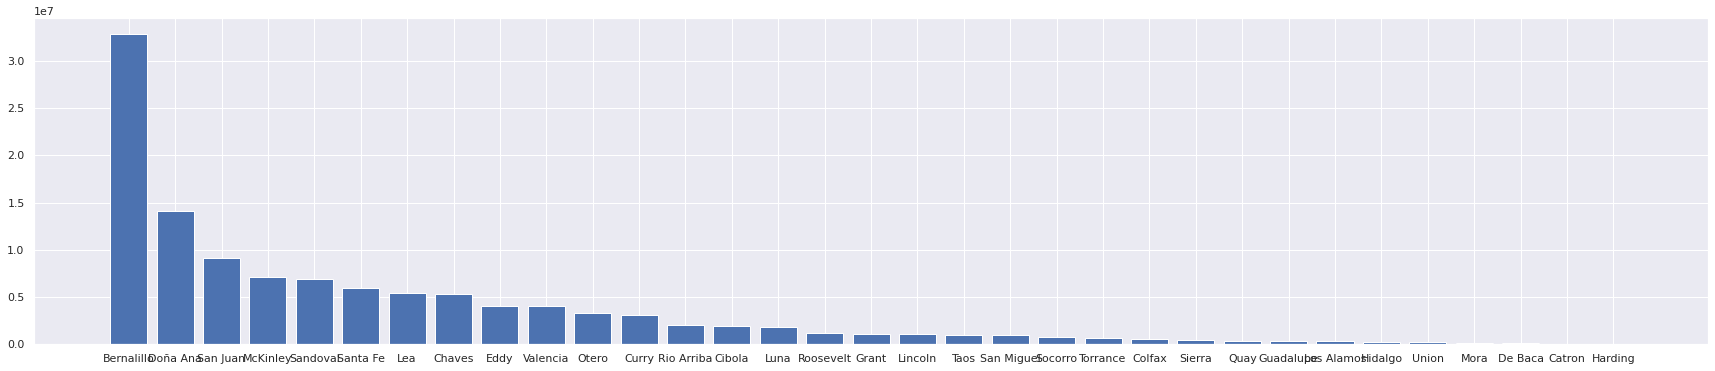

In [68]:
state_county_total('New Mexico')

          county      cases     deaths  month  cases_per_death
46       Suffolk  109496862  1960730.0   4737        55.844947
27        Nassau  101225998  1962390.0   4746        51.583018
54   Westchester   70243302  1342844.0   4749        52.309354
13          Erie   46786316   949558.0   4716        49.271678
25        Monroe   35463845   543428.0   4728        65.259510
32        Orange   26571363   413697.0   4725        64.229044
38      Rockland   26107145   445535.0   4743        58.597293
30      Onondaga   22039513   350116.0   4713        62.949174
12      Dutchess   15458320   236662.0   4725        65.318133
0         Albany   13272748   190920.0   4725        69.519946
29        Oneida   12196536   259484.0   4701        47.003037
28       Niagara   10434032   180692.0   4701        57.744848
2         Broome   10034851   182579.0   4719        54.961693
39      Saratoga    8629949    82191.0   4740       104.998710
50        Ulster    7348764   129378.0   4737        56

<BarContainer object of 57 artists>

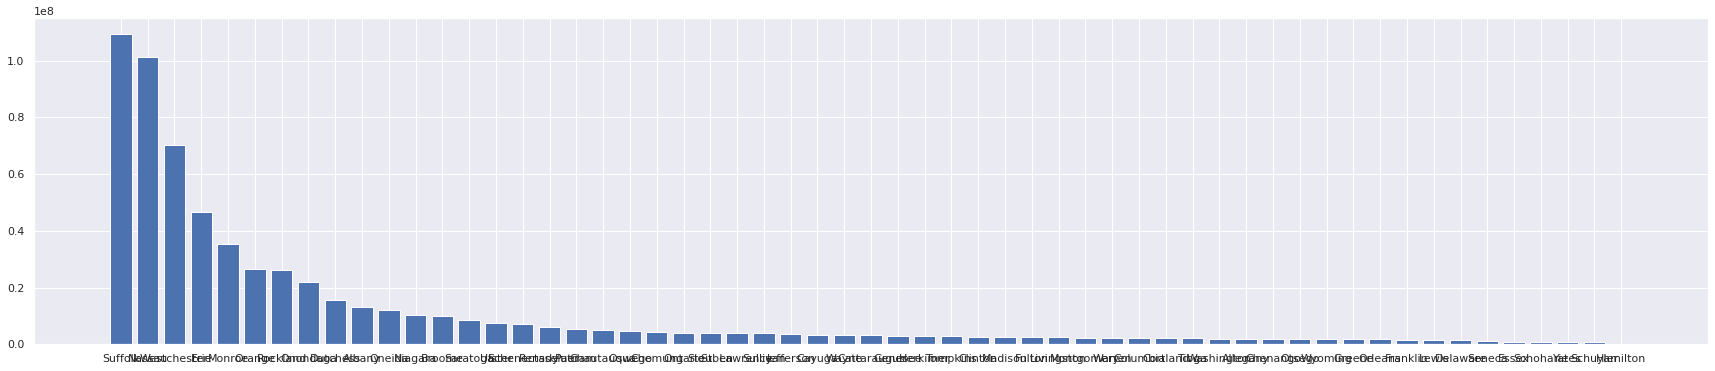

In [69]:
state_county_total('New York')

         county     cases    deaths  month  cases_per_death
59  Mecklenburg  64556903  519463.0   4725       124.276229
91         Wake  53384368  361791.0   4752       147.555821
40     Guilford  26579332  353915.0   4707        75.100891
33      Forsyth  20743898  215221.0   4725        96.384173
25   Cumberland  17177105  171724.0   4695       100.027399
..          ...       ...       ...    ...              ...
37       Graham    445337    8707.0   4557        51.147008
36        Gates    414845    6990.0   4661        59.348355
14       Camden    397556    3312.0   4561       120.035024
47         Hyde    342817    4636.0   4553        73.946721
88      Tyrrell    210166    3053.0   4613        68.839175

[100 rows x 5 columns]


<BarContainer object of 100 artists>

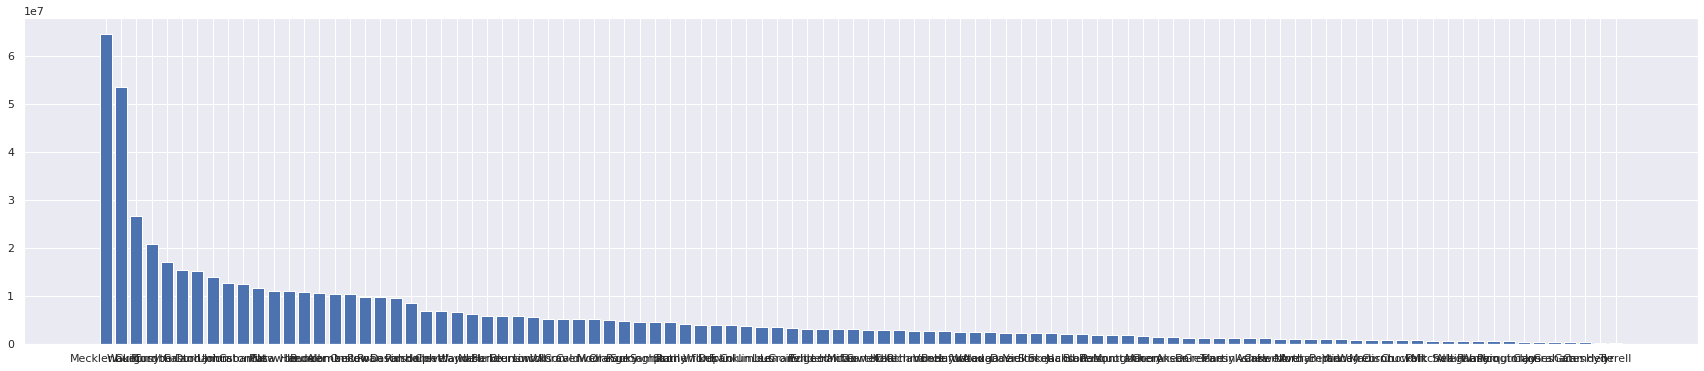

In [70]:
state_county_total('North Carolina')

           county     cases    deaths  month  cases_per_death
8            Cass  14185270  116513.0   4710       121.748389
7        Burleigh   9185349  102725.0   4710        89.416880
17    Grand Forks   5877757   39889.0   4671       147.352829
50           Ward   5498776   95853.0   4728        57.366760
29         Morton   3061108   52075.0   4707        58.782679
44          Stark   2997577   28572.0   4686       104.913097
52       Williams   2795865   21106.0   4668       132.467782
46       Stutsman   1914997   38277.0   4637        50.029966
39        Rolette   1259120   14189.0   4625        88.739164
38       Richland   1073877    8403.0   4633       127.796858
49          Walsh    999861   12505.0   4692        79.956897
35         Ramsey    945513   15276.0   4701        61.895326
26       McKenzie    841246    7487.0   4668       112.360892
30      Mountrail    805299   10273.0   4677        78.389857
1          Barnes    783686   15153.0   4677        51.718208
27      

<BarContainer object of 53 artists>

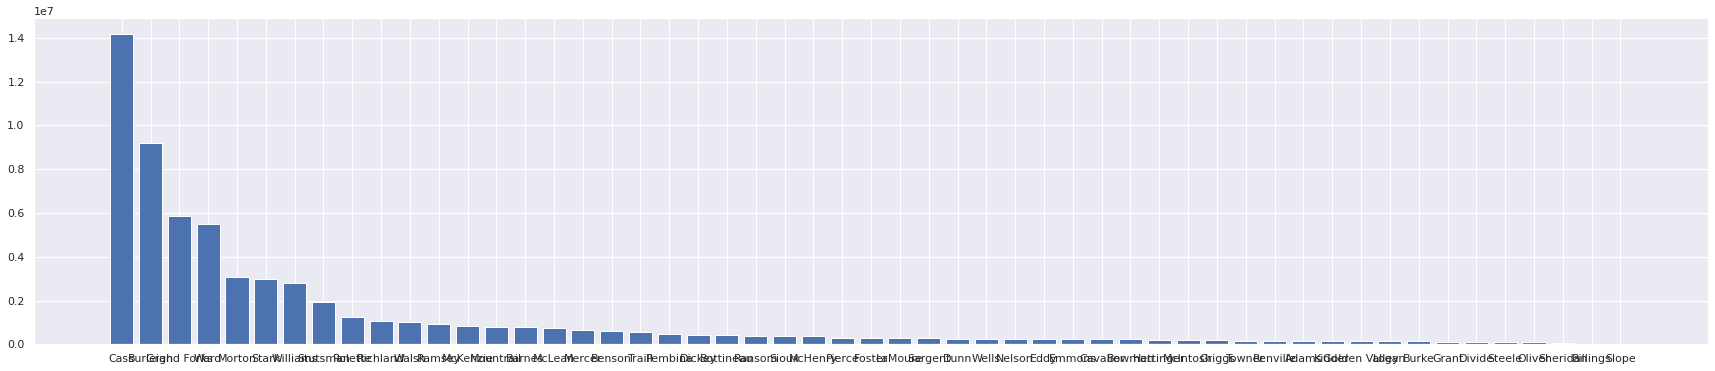

In [71]:
state_county_total('North Dakota')

   county   cases  deaths  month  cases_per_death
1  Saipan  366621  2364.0   4119       155.085025
2  Tinian    2609     0.0   4119              inf
0    Rota    1746     0.0     62              inf


<BarContainer object of 3 artists>

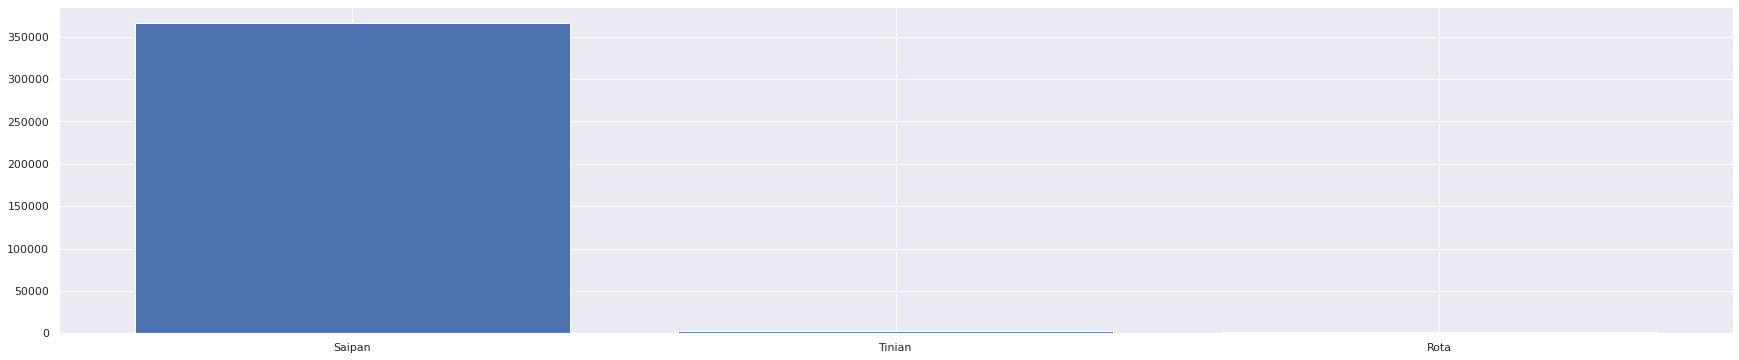

In [73]:
state_county_total('Northern Mariana Islands')

        county     cases     deaths  month  cases_per_death
24    Franklin  71134703   766973.0   4719        92.747337
17    Cuyahoga  63947314  1086273.0   4734        58.868548
30    Hamilton  44996283   600793.0   4704        74.894819
56  Montgomery  29918582   503941.0   4704        59.369216
76      Summit  26346337   506871.0   4719        51.978387
..         ...       ...        ...    ...              ...
55      Monroe    787423    24479.0   4649        32.167286
60       Noble    773174    19131.0   4633        40.414720
57      Morgan    677844    13688.0   4645        49.521040
33    Harrison    675643    17579.0   4609        38.434666
81      Vinton    568923    10613.0   4557        53.606238

[88 rows x 5 columns]


<BarContainer object of 88 artists>

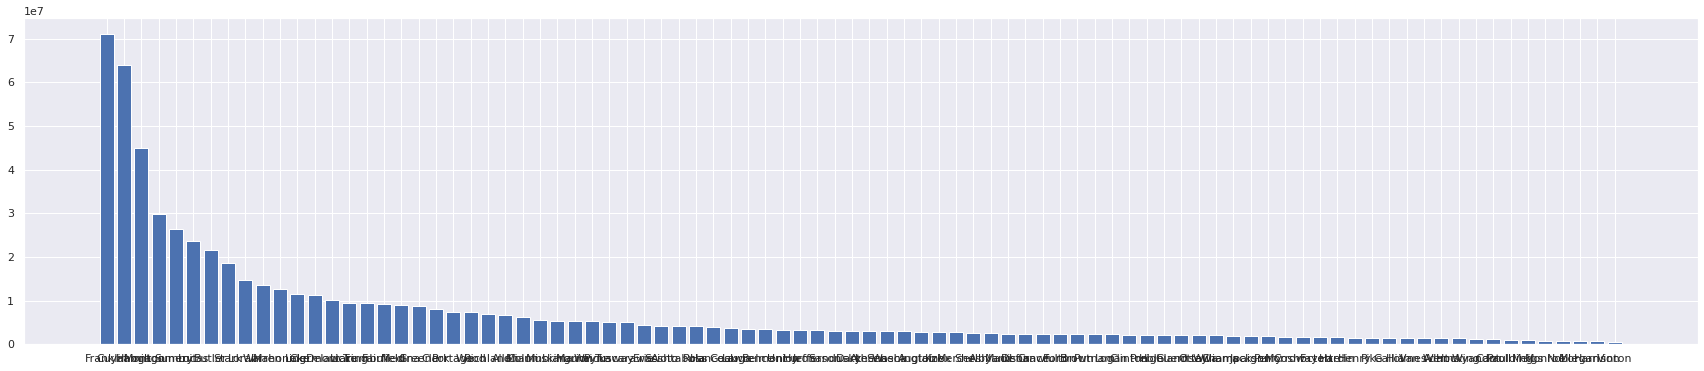

In [74]:
state_county_total('Ohio')

         county     cases    deaths  month  cases_per_death
54     Oklahoma  48485688  620215.0   4722        78.175613
71        Tulsa  42749352  561507.0   4743        76.133249
13    Cleveland  17632040  212672.0   4716        82.907200
8      Canadian   9360718   89270.0   4713       104.858497
15     Comanche   7704393   97811.0   4683        78.768165
..          ...       ...       ...    ...              ...
64  Roger Mills    215488    5074.0   4119        42.469058
29       Harper    213024    3314.0   4597        64.280024
22        Ellis    192725    2130.0   4270        90.481221
28       Harmon    157290    2382.0   4210        66.032746
12     Cimarron    122905     625.0   4585       196.648000

[77 rows x 5 columns]


<BarContainer object of 77 artists>

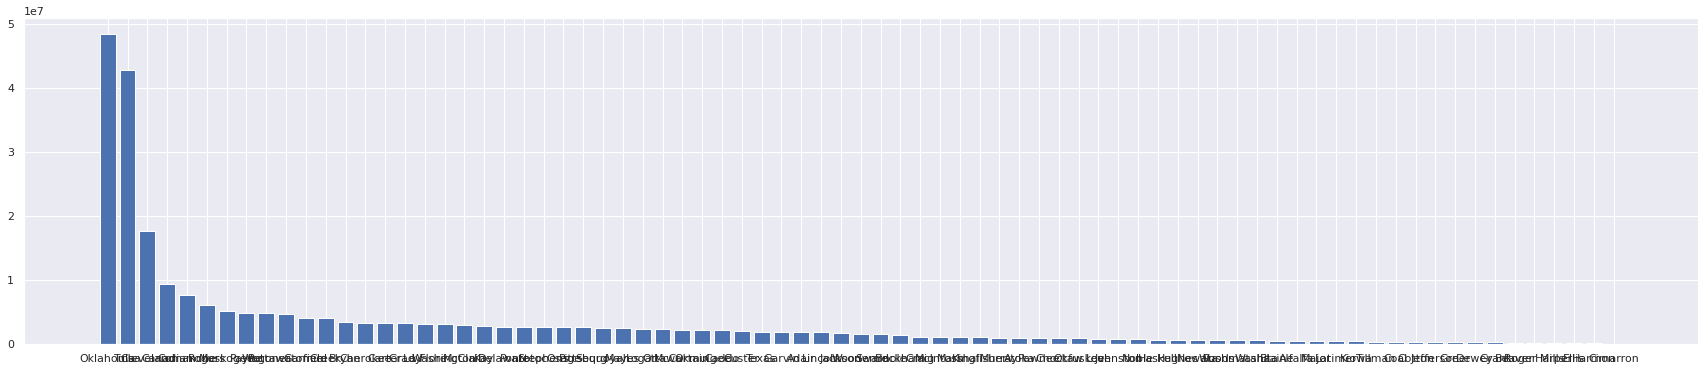

In [75]:
state_county_total('Oklahoma')

        county     cases    deaths  month  cases_per_death
25   Multnomah  22991505  320761.0   4731        71.677994
33  Washington  15800966  137086.0   4762       115.263163
23      Marion  14009790  183542.0   4737        76.330159
2    Clackamas  11192875  129720.0   4725        86.284883
19        Lane   9395003  101188.0   4710        92.847008
14     Jackson   7715837   96821.0   4740        79.691771
8    Deschutes   6906523   49622.0   4728       139.182681
29    Umatilla   5442478   57245.0   4728        95.073421
21        Linn   4119576   49025.0   4728        84.030107
9      Douglas   3361889   67842.0   4737        49.554686
35     Yamhill   3137255   45404.0   4716        69.096445
16   Josephine   2780268   57764.0   4698        48.131501
17     Klamath   2677560   41200.0   4740        64.989320
26        Polk   2615040   32691.0   4728        79.992659
22     Malheur   2215250   34928.0   4668        63.423328
1       Benton   2107046   13108.0   4713       160.7450

<BarContainer object of 36 artists>

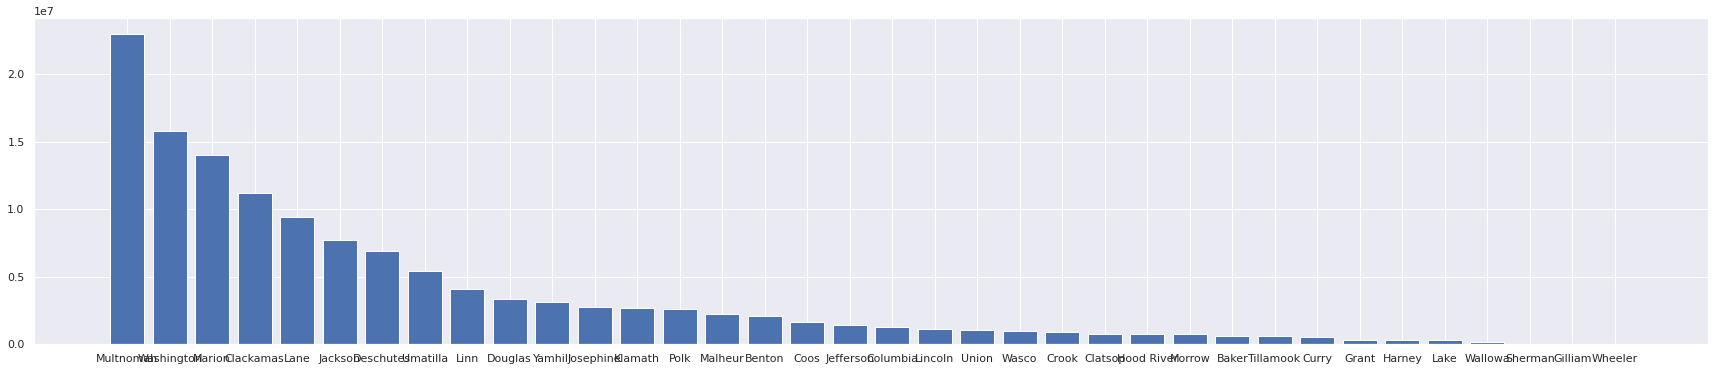

In [76]:
state_county_total('Oregon')

Empty DataFrame
Columns: [county, cases, deaths, month, cases_per_death]
Index: []


<BarContainer object of 0 artists>

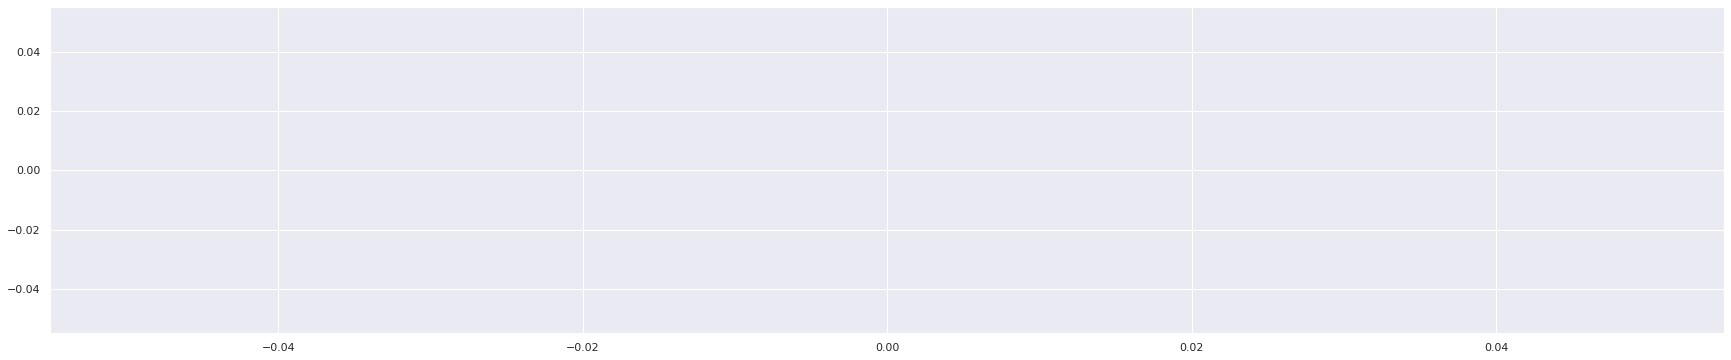

In [77]:
state_county_total('Pennyslvania')

       county     cases     deaths  month  cases_per_death
3  Providence  52070663  1040774.0   4686        50.030711
1        Kent   9863780   179803.0   4686        54.858818
4  Washington   5675679    88903.0   4686        63.841254
2     Newport   3643035    20327.0   4686       179.221479
0     Bristol   2655008    64199.0   4686        41.355909


<BarContainer object of 5 artists>

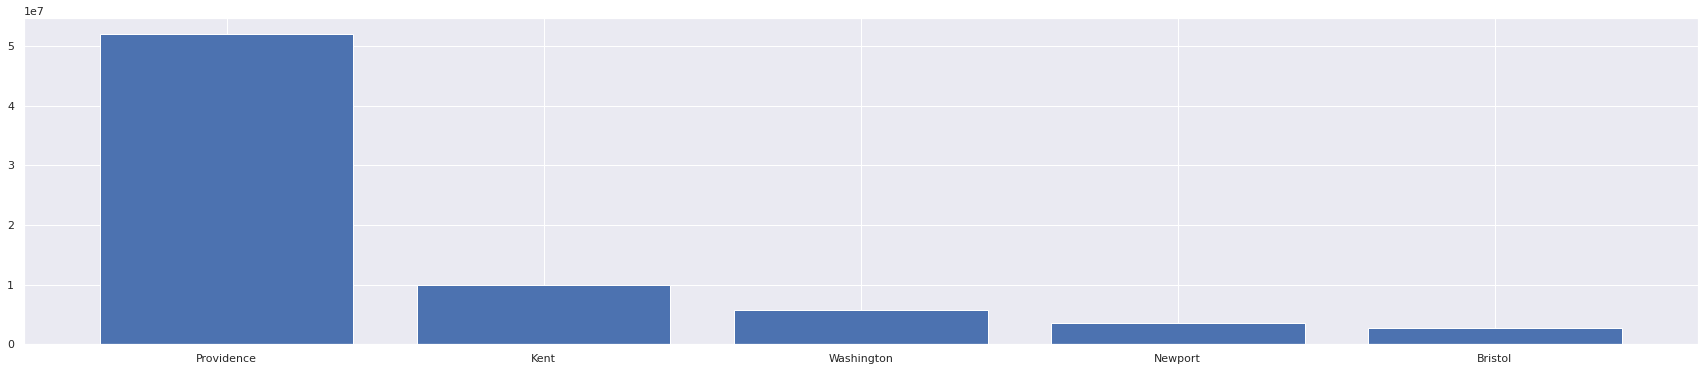

In [78]:
state_county_total('Rhode Island')

          county     cases    deaths  month  cases_per_death
22    Greenville  41200362  548210.0   4716        75.154342
39      Richland  27806896  312285.0   4710        89.043329
9     Charleston  26277660  289431.0   4743        90.790758
25         Horry  23364538  330615.0   4716        70.669927
41   Spartanburg  22965873  432987.0   4737        53.040560
31     Lexington  20358280  269095.0   4719        75.654620
45          York  17703494  192195.0   4710        92.112147
3       Anderson  13449610  283043.0   4716        47.517904
17    Dorchester  11702304  131473.0   4704        89.009181
7       Berkeley  11315620  121847.0   4701        92.867449
38       Pickens  10612547  162511.0   4701        65.303561
20      Florence  10410170  225751.0   4701        46.113506
6       Beaufort  10389933  116580.0   4719        89.122774
1          Aiken  10019138  126826.0   4701        78.999085
42        Sumter   6359750  114712.0   4701        55.441018
28     Lancaster   60375

<BarContainer object of 46 artists>

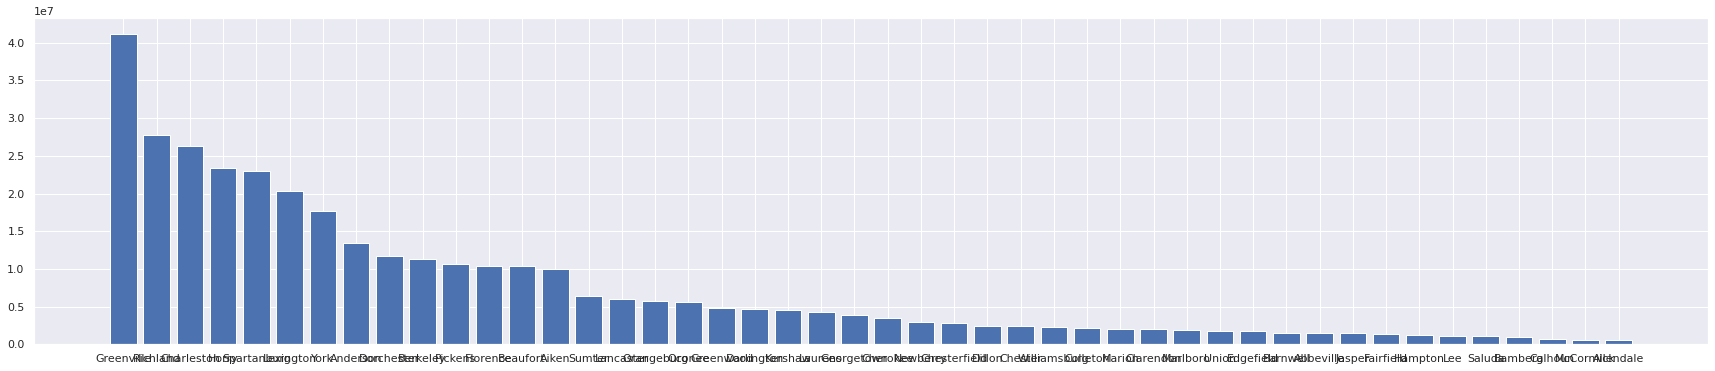

In [79]:
state_county_total('South Carolina')

        county     cases    deaths  month  cases_per_death
48   Minnehaha  17094116  181139.0   4731        94.370158
51  Pennington   8186179  103057.0   4692        79.433508
40     Lincoln   4569095   36545.0   4686       125.026543
5        Brown   2986646   42247.0   4695        70.694866
13   Codington   2397960   38128.0   4692        62.892363
..         ...       ...       ...    ...              ...
33        Hyde     80230     911.0   4617        88.068057
9     Campbell     74517    1979.0   4196        37.653866
58       Sully     74114    1393.0   4621        53.204594
30     Harding     58019     626.0   3897        92.682109
36       Jones     52397     162.0   4161       323.438272

[66 rows x 5 columns]


<BarContainer object of 66 artists>

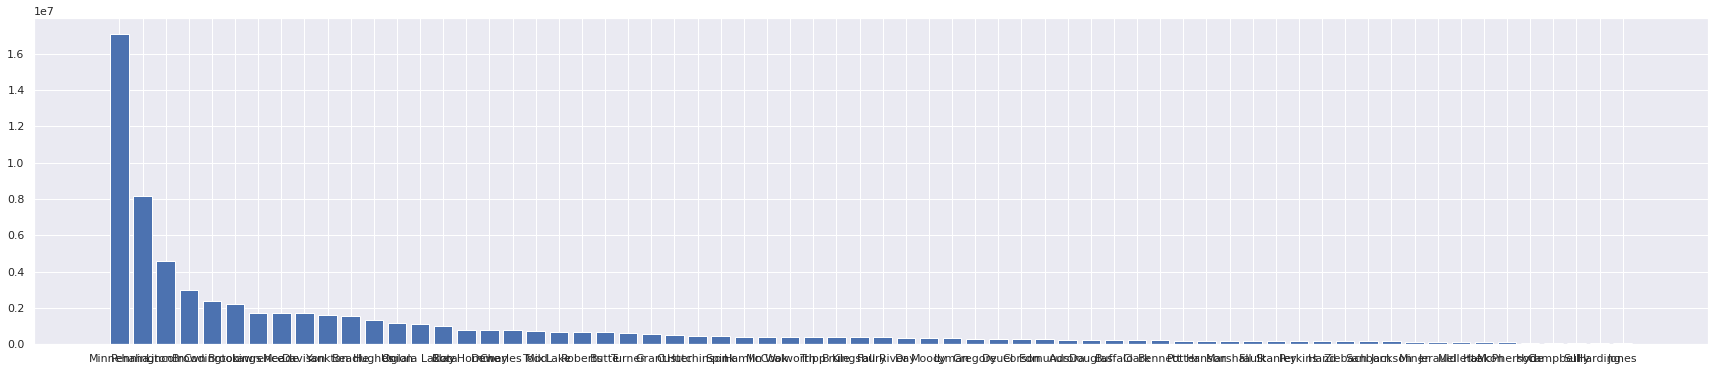

In [81]:
state_county_total('South Dakota')

        county     cases    deaths  month  cases_per_death
78      Shelby  59481286  912299.0   4737        65.199333
18    Davidson  56058085  500631.0   4737       111.974858
46        Knox  29699941  337813.0   4725        87.918289
32    Hamilton  25357130  271319.0   4722        93.458733
74  Rutherford  24405897  231640.0   4722       105.361324
..         ...       ...       ...    ...              ...
13        Clay    608256   15564.0   4665        39.080956
63       Moore    559450    8711.0   4609        64.223396
87   Van Buren    471615   11064.0   4617        42.626085
68     Pickett    431382   11310.0   4500        38.141645
33     Hancock    397601    7149.0   4455        55.616310

[95 rows x 5 columns]


<BarContainer object of 95 artists>

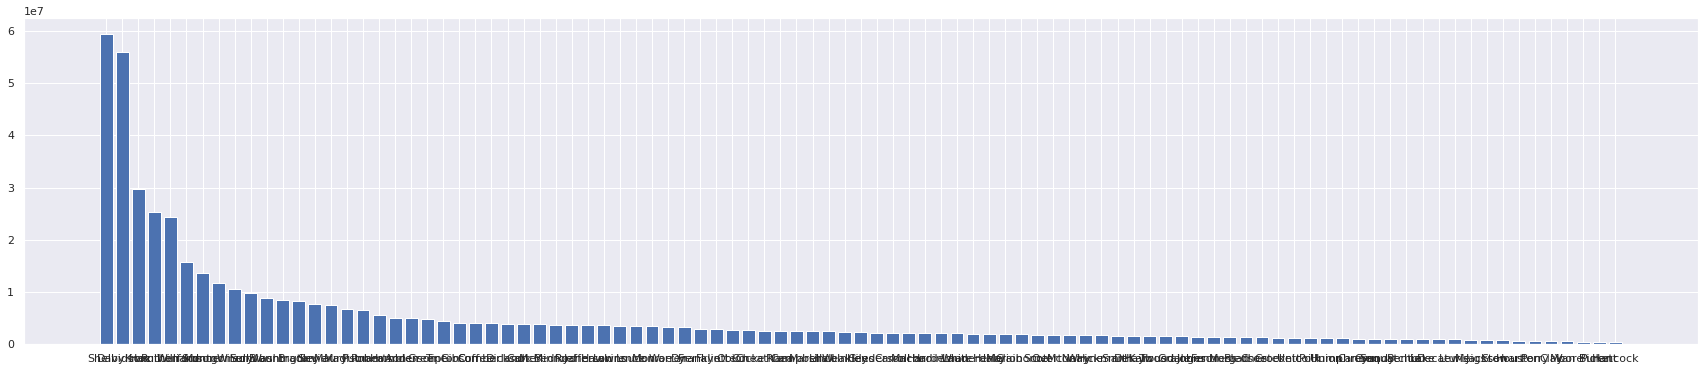

In [83]:
state_county_total('Tennessee')

                        county      cases     deaths  month  cases_per_death
100                     Harris  238141531  3500525.0   4746        68.030233
56                      Dallas  167006487  2104179.0   4731        79.368954
220                    Tarrant  143937865  1769220.0   4731        81.356680
14                       Bexar  127645081  1914809.0   4794        66.662044
69                     El Paso   68289636  1278359.0   4722        53.419764
..                         ...        ...        ...    ...              ...
130                     Kenedy      21838     1099.0   4196        19.870792
16                      Borden      16881      775.0   3547        21.781935
150                     Loving       7524        0.0   2989              inf
134                       King       7232        0.0   3355              inf
186  Pending County Assignment        260        0.0      8              inf

[255 rows x 5 columns]


<BarContainer object of 255 artists>

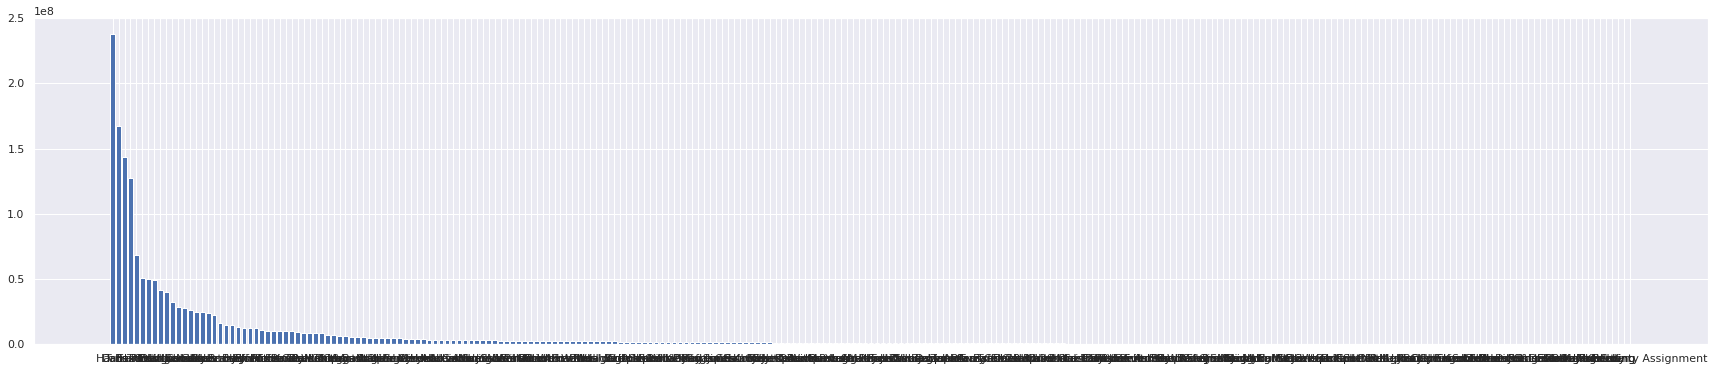

In [84]:
state_county_total('Texas')

        county     cases    deaths  month  cases_per_death
17   Salt Lake  85075944  481829.0   4768       176.568749
24        Utah  53362282  210858.0   4716       253.072124
5        Davis  22321055   97456.0   4743       229.037258
28       Weber  16937708  110166.0   4731       153.747145
26  Washington  11814341  111995.0   4743       105.489897
2        Cache   9112154   25427.0   4707       358.365281
22      Tooele   4517098   23150.0   4713       195.123024
10        Iron   3407887   19600.0   4692       173.871786
1    Box Elder   3249966   29190.0   4707       111.338335
21      Summit   3097616    6462.0   4719       479.358712
25     Wasatch   2627551   11873.0   4713       221.304725
19     Sanpete   2050812   12608.0   4597       162.659581
23      Uintah   1692342   14217.0   4680       119.036506
20      Sevier   1302185    6764.0   4609       192.517002
18    San Juan   1114878   21899.0   4677        50.909996
3       Carbon   1081231    9918.0   4657       109.0170

<BarContainer object of 29 artists>

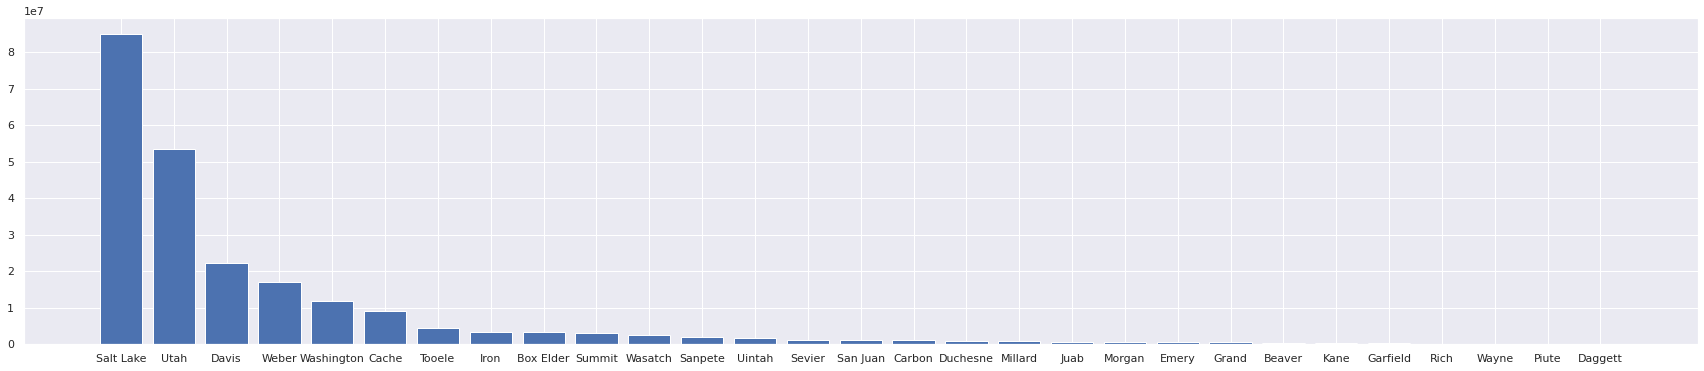

In [85]:
state_county_total('Utah')

        county    cases   deaths  month  cases_per_death
3   Chittenden  4500263  57590.0   4728        78.143132
10     Rutland  1563782  10897.0   4701       143.505736
11  Washington  1314744   9141.0   4719       143.829340
1   Bennington  1301152   9452.0   4740       137.658908
5     Franklin  1280146  20156.0   4698        63.511907
13     Windsor  1071834   9472.0   4719       113.158150
12     Windham   900365   8804.0   4698       102.267719
9      Orleans   840245   6337.0   4689       132.593499
2    Caledonia   681670   4654.0   4689       146.469703
0      Addison   647315   4140.0   4701       156.356280
7     Lamoille   526429   2456.0   4686       214.344055
8       Orange   512209   1916.0   4713       267.332463
4        Essex   187511    749.0   4637       250.348465
6   Grand Isle   135163    797.0   4641       169.589711


<BarContainer object of 14 artists>

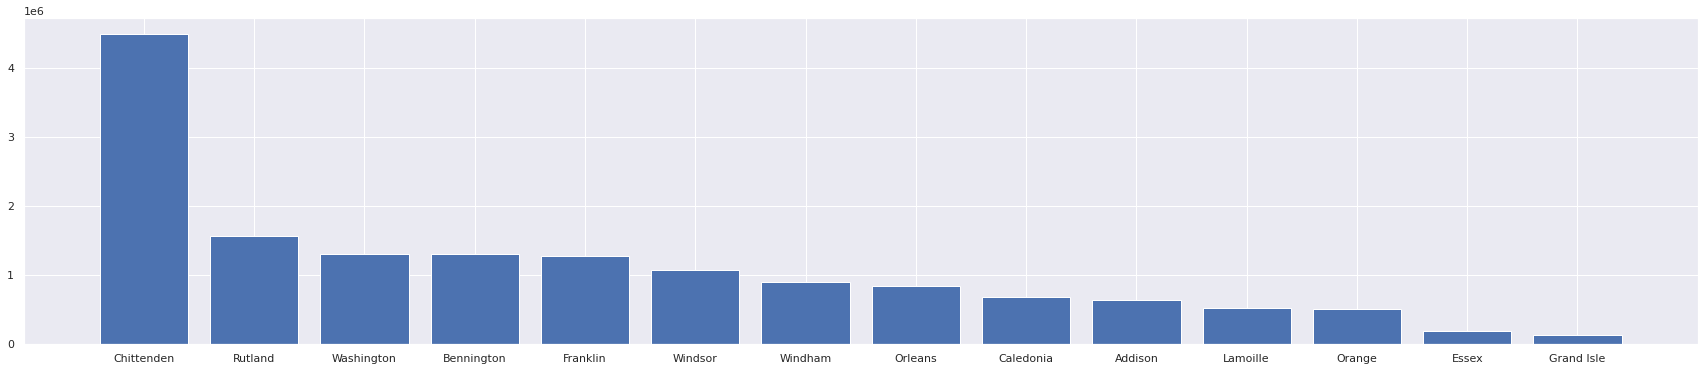

In [86]:
state_county_total('Vermont')

       county    cases   deaths  month  cases_per_death
2  St. Thomas  1363640  14474.0   4645        94.213072
0   St. Croix  1177894   9493.0   4645       124.080270
1    St. John   146059   1046.0   4645       139.635755


<BarContainer object of 3 artists>

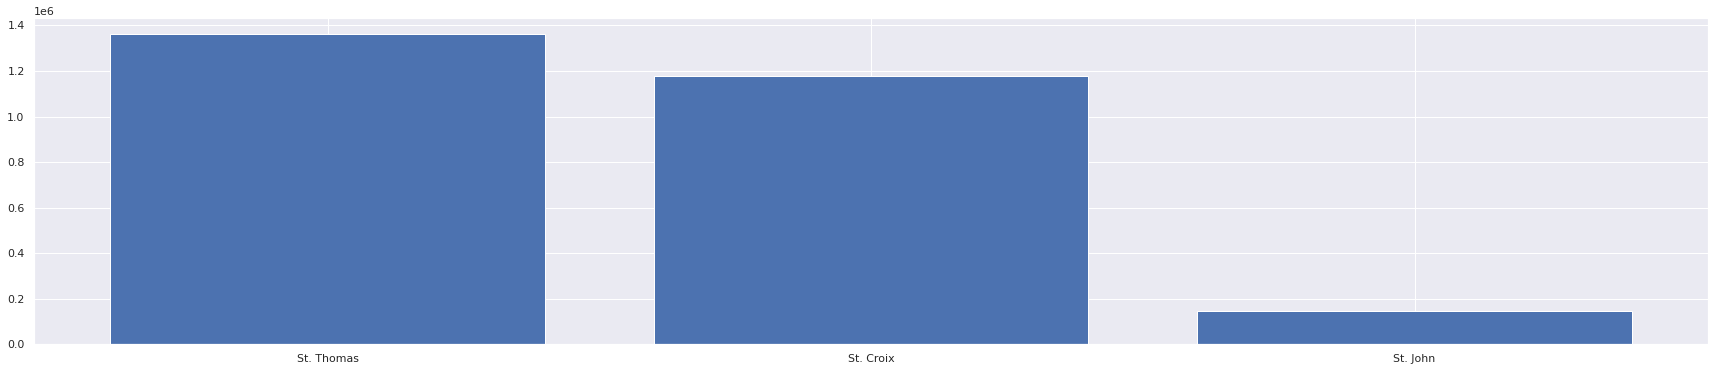

In [87]:
state_county_total('Virgin Islands')

                  county     cases    deaths  month  cases_per_death
37               Fairfax  42354716  588144.0   4740        72.014194
100       Prince William  24663911  256794.0   4725        96.045511
123  Virginia Beach city  20016608  204857.0   4734        97.710149
25          Chesterfield  15875944  213655.0   4719        74.306447
70               Loudoun  15263000  142889.0   4731       106.817180
..                   ...       ...       ...    ...              ...
103         Rappahannock    210432    1824.0   4641       115.368421
88           Norton city    203209    4232.0   4585        48.017250
29                 Craig    200955    2866.0   4641        70.116888
9                   Bath    167087    4797.0   4161        34.831561
60              Highland     66181     787.0   4581        84.092757

[133 rows x 5 columns]


<BarContainer object of 133 artists>

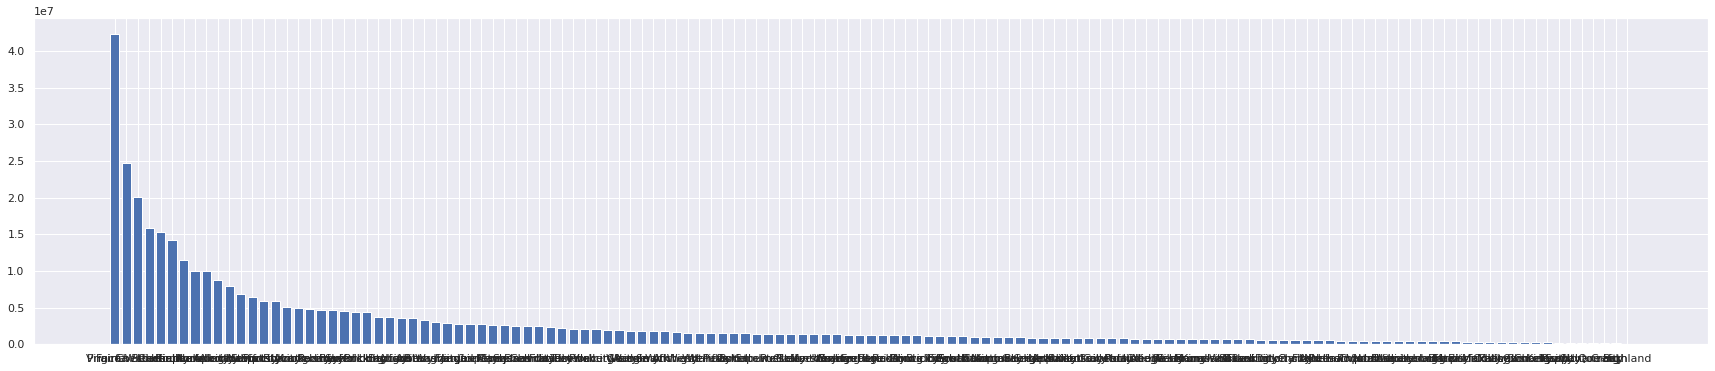

In [88]:
state_county_total('Virginia')

          county     cases    deaths  month  cases_per_death
16          King  67397522  929325.0   4762        72.523091
26        Pierce  34136650  363641.0   4743        93.874591
31       Spokane  26724783  372378.0   4770        71.767889
30     Snohomish  25837581  336131.0   4827        76.867593
38        Yakima  18792273  269775.0   4725        69.659060
5          Clark  15387940  174840.0   4743        88.011553
2         Benton  11391620  147979.0   4707        76.981328
10      Franklin   7872643   71104.0   4710       110.720114
33      Thurston   7268813   73269.0   4728        99.207209
12         Grant   6351997   68709.0   4722        92.447816
36       Whatcom   6056874   67055.0   4731        90.326955
17        Kitsap   5889766   70069.0   4737        84.056658
3         Chelan   4398466   40913.0   4749       107.507785
7        Cowlitz   4199572   65119.0   4701        64.490732
28        Skagit   3996025   45493.0   4731        87.838239
35   Walla Walla   32947

<BarContainer object of 39 artists>

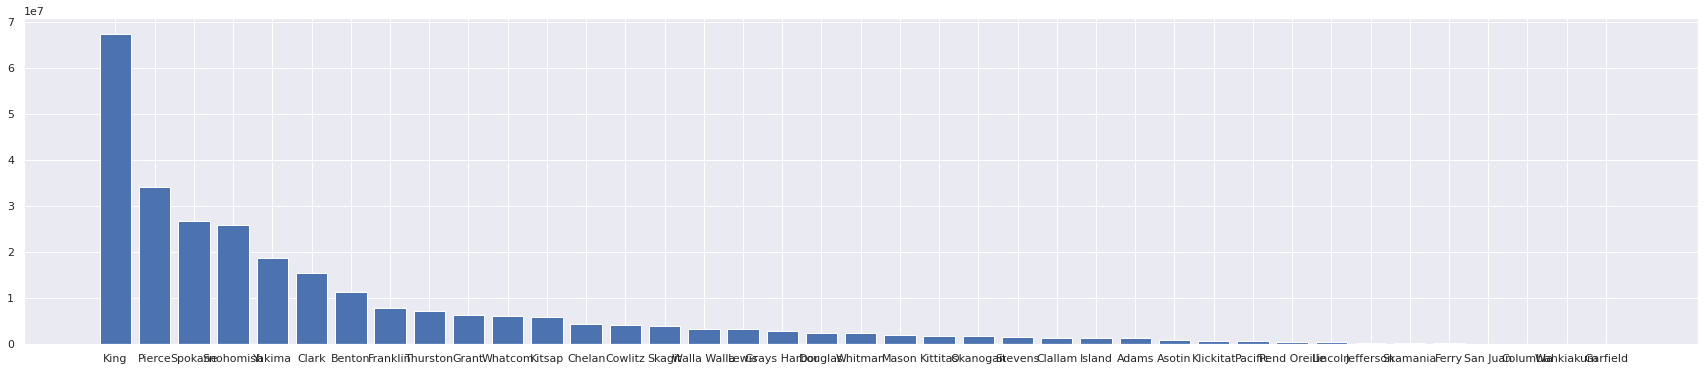

In [89]:
state_county_total('Washington')

        county    cases    deaths  month  cases_per_death
19     Kanawha  9151150  187385.0   4701        48.836086
1     Berkeley  7199110   66903.0   4689       107.605190
5       Cabell  5413075   94645.0   4674        57.193460
30  Monongalia  5280817   46909.0   4704       112.575774
53        Wood  4684875   84693.0   4689        55.315965
40     Raleigh  4040383   55713.0   4686        72.521368
16    Harrison  3730593   50000.0   4689        74.611860
39      Putnam  3194442   47279.0   4698        67.565769
27      Mercer  3119809   65653.0   4707        47.519672
23      Marion  2771635   32453.0   4686        85.404585
18   Jefferson  2731033   29766.0   4710        91.750084
34        Ohio  2403321   41743.0   4686        57.574228
9      Fayette  2223628   45474.0   4641        48.898887
24    Marshall  1966519   40906.0   4698        48.074097
49       Wayne  1951680   26457.0   4633        73.768001
22       Logan  1935454   52267.0   4686        37.030134
38     Preston

<BarContainer object of 55 artists>

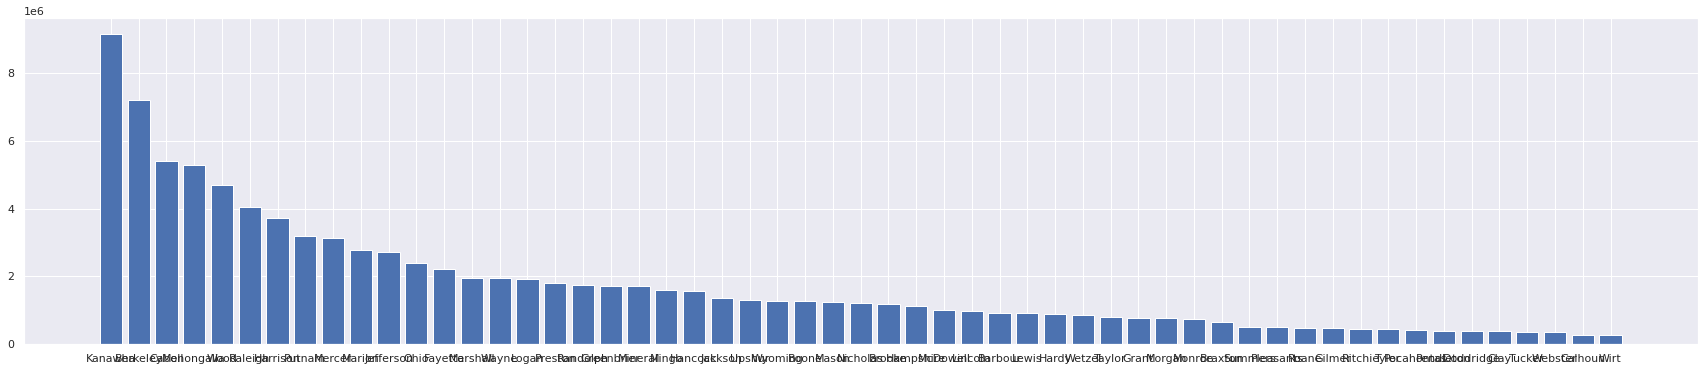

In [90]:
state_county_total('West Virginia')

Empty DataFrame
Columns: [county, cases, deaths, month, cases_per_death]
Index: []


<BarContainer object of 0 artists>

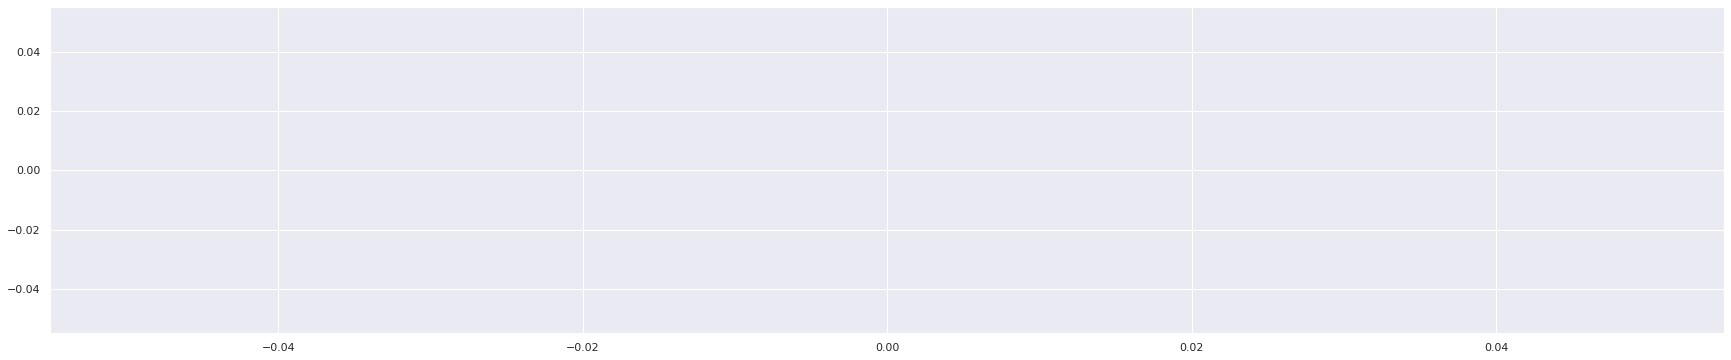

In [91]:
state_county_total('Misconsin')

         county    cases   deaths  month  cases_per_death
10      Laramie  5940775  66979.0   4710        88.696084
12      Natrona  5161723  72388.0   4701        71.306335
6       Fremont  3229389  49346.0   4722        65.443785
2      Campbell  3061989  34872.0   4701        87.806521
18   Sweetwater  2643560  26364.0   4689       100.271582
0        Albany  2527271  10341.0   4686       244.393289
19        Teton  2143444   4948.0   4707       433.194018
16     Sheridan  1946674  17483.0   4728       111.346680
14         Park  1727568  23758.0   4710        72.715212
20        Uinta  1382526   8653.0   4661       159.774182
3        Carbon  1001325  13781.0   4698        72.659821
11      Lincoln   914857   7524.0   4657       121.591839
7        Goshen   796505  13957.0   4680        57.068496
4      Converse   712658  11676.0   4677        61.036143
1      Big Horn   683742  18031.0   4621        37.920359
21     Washakie   575795  13855.0   4680        41.558643
17     Sublett

<BarContainer object of 23 artists>

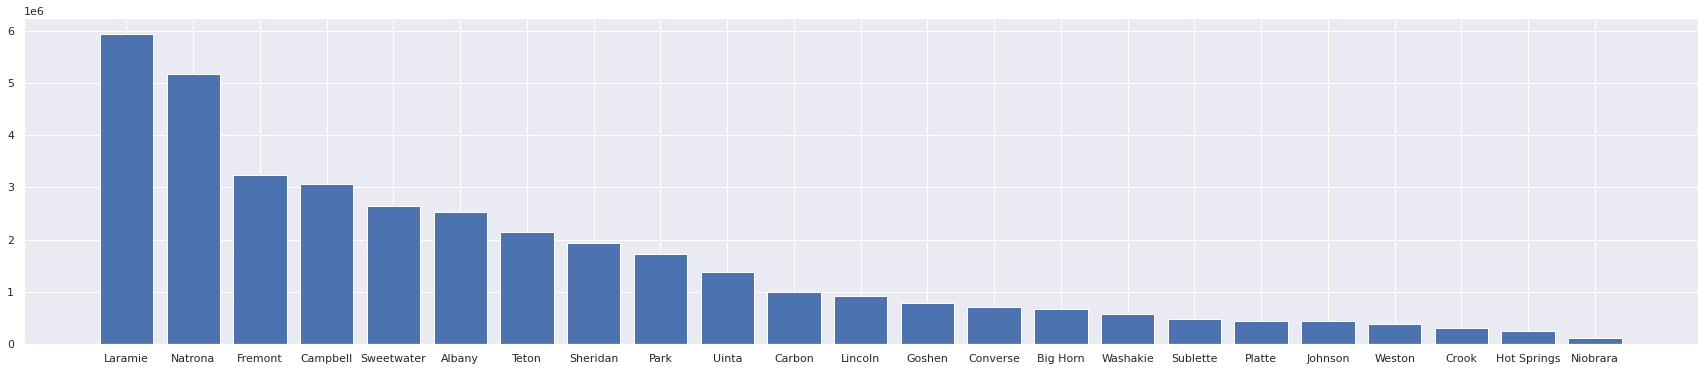

In [92]:
state_county_total('Wyoming')